# Economic Analysis: Bessent's Macroeconomic Assertions

This notebook provides a skeptical economist's analysis of the assertions made in the transcript regarding macroeconomic policy, inflation, investment, and proposed government programs.

## Methodology
For each assertion identified in the transcript, we:
1. State the assertion clearly
2. Identify the underlying economic mechanism (if stated or implied)
3. Generate testable hypotheses to evaluate plausibility
4. Note potential issues, contradictions, or missing considerations

**Note:** This analysis is designed to be generous but rigorous, identifying both the logical structure of claims and potential empirical tests.


## Transcript Text

> "and my prediction is the first quarter, second quarter, what we are going to see is we have brought the inflation down. It is curbing down and real income. The other side of that equation is real income growth. And we are going to see this from all this investment. Would a $2,000 tariff dividend check going to people be inflationary? Well, there are a lot of things that are going to happen next year. Is that one of them? That could be one of them. And again, maybe we could be a persuade Americans to save that. Because one of the things that is going to happen next year, the Trump accounts, every child who was born from January 1st for the next three years, is going to get a government account that goes into the stock market. So every American child born for the next three years, starting January 1st, is going to have that. They can take it out when they are 18. They are going to learn the power of compounding. And there is going to be a lot of financial literacy around that. And I think the reason that we saw kind of the disastrous election in New York is young people don't feel like they have a stake in the economy. So we want to give them a stake in the economy. We know that"


In [1]:
# Import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import warnings
warnings.filterwarnings('ignore')

# Try to import seaborn (optional)
try:
    import seaborn as sns
    SEABORN_AVAILABLE = True
except ImportError:
    SEABORN_AVAILABLE = False
    sns = None
    print("⚠ seaborn not available. Install with: pip install seaborn (optional)")

# Set up dark mode plotting style (inspired by UNC baseball dark jerseys)
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.facecolor': '#1B3A6B',      # Navy blue figure background
    'axes.facecolor': '#0F1F3A',        # Dark navy axes background
    'axes.edgecolor': '#4B9CD3',        # Carolina blue axes edges
    'axes.labelcolor': '#E8E8E8',       # Light gray text for labels
    'xtick.color': '#E8E8E8',           # Light gray tick labels
    'ytick.color': '#E8E8E8',           # Light gray tick labels
    'text.color': '#E8E8E8',            # Light gray for all text
    'grid.color': '#2A4A6B',            # Subtle navy grid
    'grid.alpha': 0.3,                  # Low opacity for subtlety
    'figure.figsize': (12, 6),          # Default figure size
    'legend.facecolor': '#1B3A6B',      # Navy legend background
    'legend.edgecolor': '#4B9CD3',      # Carolina blue legend border
    'legend.framealpha': 0.9,           # Slightly transparent
})

print("Libraries imported successfully.")
print("Dark mode plotting style configured.")
print("\nFRED API will be used for data downloads.")


Libraries imported successfully.
Dark mode plotting style configured.

FRED API will be used for data downloads.


In [2]:
# Setup FRED API
FRED_API_KEY = os.getenv('FRED_API_KEY')

if not FRED_API_KEY:
    print("⚠ FRED_API_KEY environment variable not set.")
    print("  Set it with: export FRED_API_KEY='your_api_key'")
    print("  Or in Python: import os; os.environ['FRED_API_KEY'] = 'your_api_key'")
    FRED_API_AVAILABLE = False
else:
    # Try to import and setup fredapi
    try:
        from fredapi import Fred
        fred = Fred(api_key=FRED_API_KEY)
        FRED_API_AVAILABLE = True
        print("✓ FRED API configured and ready")
    except ImportError:
        FRED_API_AVAILABLE = False
        print("⚠ fredapi not available. Install with: pip install fredapi")

# If FRED API is not available, try fallback methods
if not FRED_API_AVAILABLE:
    print("  Falling back to alternative methods...")
    try:
        import pandas_datareader.data as web
        DATA_READER_AVAILABLE = True
        print("✓ pandas_datareader available as fallback")
    except ImportError:
        DATA_READER_AVAILABLE = False
        print("⚠ pandas_datareader not available. Install with: pip install pandas-datareader")

# Try yfinance for some data
try:
    import yfinance as yf
    YFINANCE_AVAILABLE = True
    print("✓ yfinance available")
except ImportError:
    YFINANCE_AVAILABLE = False
    print("⚠ yfinance not available. Install with: pip install yfinance")

print("\nData reader setup complete.")
print("Note: Some data downloads may require internet connection.")


⚠ FRED_API_KEY environment variable not set.
  Set it with: export FRED_API_KEY='your_api_key'
  Or in Python: import os; os.environ['FRED_API_KEY'] = 'your_api_key'
  Falling back to alternative methods...
✓ pandas_datareader available as fallback
✓ yfinance available

Data reader setup complete.
Note: Some data downloads may require internet connection.


---

## Assertion 1: Inflation Will Decline in Q1-Q2

**Statement:** "the first quarter, second quarter, what we are going to see is we have brought the inflation down. It is curbing down"

### Economic Mechanism
Implies that policy actions (presumably monetary and/or fiscal) have already been implemented and will manifest in reduced inflation rates in Q1-Q2 of the following year.

### Testable Hypotheses

1. **Hypothesis H1.1:** Year-over-year CPI inflation rate will be lower in Q1 and Q2 of the target year compared to the preceding quarters.
   - **Test:** Compare YoY CPI for Q1 and Q2 vs. Q3 and Q4 of prior year
   - **Data needed:** BLS CPI data, quarterly averages
   - **Caveat:** Need to control for base effects and seasonal adjustments

2. **Hypothesis H1.2:** Core PCE inflation (Fed's preferred measure) will decline in Q1-Q2.
   - **Test:** Quarterly average of monthly Core PCE YoY changes
   - **Data needed:** BEA PCE data

3. **Hypothesis H1.3:** The decline in inflation will be attributable to policy actions rather than exogenous factors (supply chain normalization, commodity price changes, etc.).
   - **Test:** Regression analysis with policy variables (interest rates, fiscal stance) vs. supply-side variables (commodity prices, supply chain indices)
   - **Data needed:** Fed funds rate, fiscal deficit/GDP, commodity indices, supply chain pressure indices

### Code Implementation

The following code cells test these hypotheses by:
- **H1.1 & H1.2:** Downloading and analyzing CPI, Core CPI, and Core PCE data to examine quarterly inflation trends
- **H1.3:** Examining policy variables (Fed Funds Rate) and supply-side drivers (PPI, oil prices, wage inflation) to assess attribution

### Issues & Concerns

- **Timing ambiguity:** "We have brought inflation down" suggests past action, but prediction is for future. What is the lag structure?
- **Causality:** No clear mechanism stated. Is this monetary policy (Fed), fiscal policy, or both?
- **Base effects:** If inflation was high in prior year, mechanical base effects could create apparent decline even if current price pressures remain.
- **Confounding factors:** Global commodity prices, supply chain disruptions, and labor market tightness may dominate policy effects.


In [3]:
# Download inflation data from FRED or alternative sources
# CPI: CPIAUCSL (Consumer Price Index for All Urban Consumers: All Items)
# Core PCE: PCEPILFE (Personal Consumption Expenditures Excluding Food and Energy)

def get_fred_data(series_id, start_date='2020-01-01'):
    """Download data from FRED using FRED API (fredapi)"""
    try:
        if FRED_API_AVAILABLE:
            # Use FRED API with the configured API key
            data = fred.get_series(series_id, start=start_date)
            if data is not None and len(data) > 0:
                data = pd.DataFrame(data, columns=[series_id])
                data.index.name = 'DATE'
                return data
            else:
                return None
        elif DATA_READER_AVAILABLE:
            # Fallback to pandas_datareader
            data = web.DataReader(series_id, 'fred', start_date)
            return data
        else:
            # Alternative: construct URL for direct download
            url = f"https://fred.stlouisfed.org/graph/fredgraph.csv?id={series_id}"
            data = pd.read_csv(url, index_col=0, parse_dates=True)
            data = data[data.index >= start_date]
            return data
    except Exception as e:
        print(f"  Error downloading {series_id}: {e}")
        print(f"  You can manually download from: https://fred.stlouisfed.org/series/{series_id}")
        return None

# Download CPI data
print("Downloading CPI data (CPIAUCSL)...")
try:
    cpi = get_fred_data('CPIAUCSL', '2020-01-01')
    if cpi is not None and len(cpi) > 0:
        cpi.columns = ['CPI']
        # Calculate YoY inflation
        cpi['CPI_YoY'] = cpi['CPI'].pct_change(12) * 100
        print(f"✓ CPI data downloaded: {len(cpi)} observations")
        print(f"  Latest date: {cpi.index[-1].strftime('%Y-%m-%d')}")
        print(f"  Latest CPI YoY: {cpi['CPI_YoY'].iloc[-1]:.2f}%")
    else:
        print("⚠ Could not download CPI data - will use alternative or skip")
        cpi = None
except Exception as e:
    print(f"⚠ Error: {e}")
    cpi = None


✓ CPI data downloaded: 69 observations
  Latest date: 2025-09-01
  Latest CPI YoY: 3.02%


In [4]:
# Download Core PCE data
print("\nDownloading Core PCE data (PCEPILFE)...")
try:
    core_pce = get_fred_data('PCEPILFE', '2020-01-01')
    if core_pce is not None and len(core_pce) > 0:
        core_pce.columns = ['Core_PCE']
        # Calculate YoY inflation
        core_pce['Core_PCE_YoY'] = core_pce['Core_PCE'].pct_change(12) * 100
        print(f"✓ Core PCE data downloaded: {len(core_pce)} observations")
        print(f"  Latest date: {core_pce.index[-1].strftime('%Y-%m-%d')}")
        print(f"  Latest Core PCE YoY: {core_pce['Core_PCE_YoY'].iloc[-1]:.2f}%")
    else:
        print("⚠ Could not download Core PCE data - will use alternative or skip")
        core_pce = None
except Exception as e:
    print(f"⚠ Error: {e}")
    core_pce = None



✓ Core PCE data downloaded: 68 observations
  Latest date: 2025-08-01
  Latest Core PCE YoY: 2.91%



✓ Core CPI data downloaded: 69 observations
  Latest Core CPI YoY: 3.03%


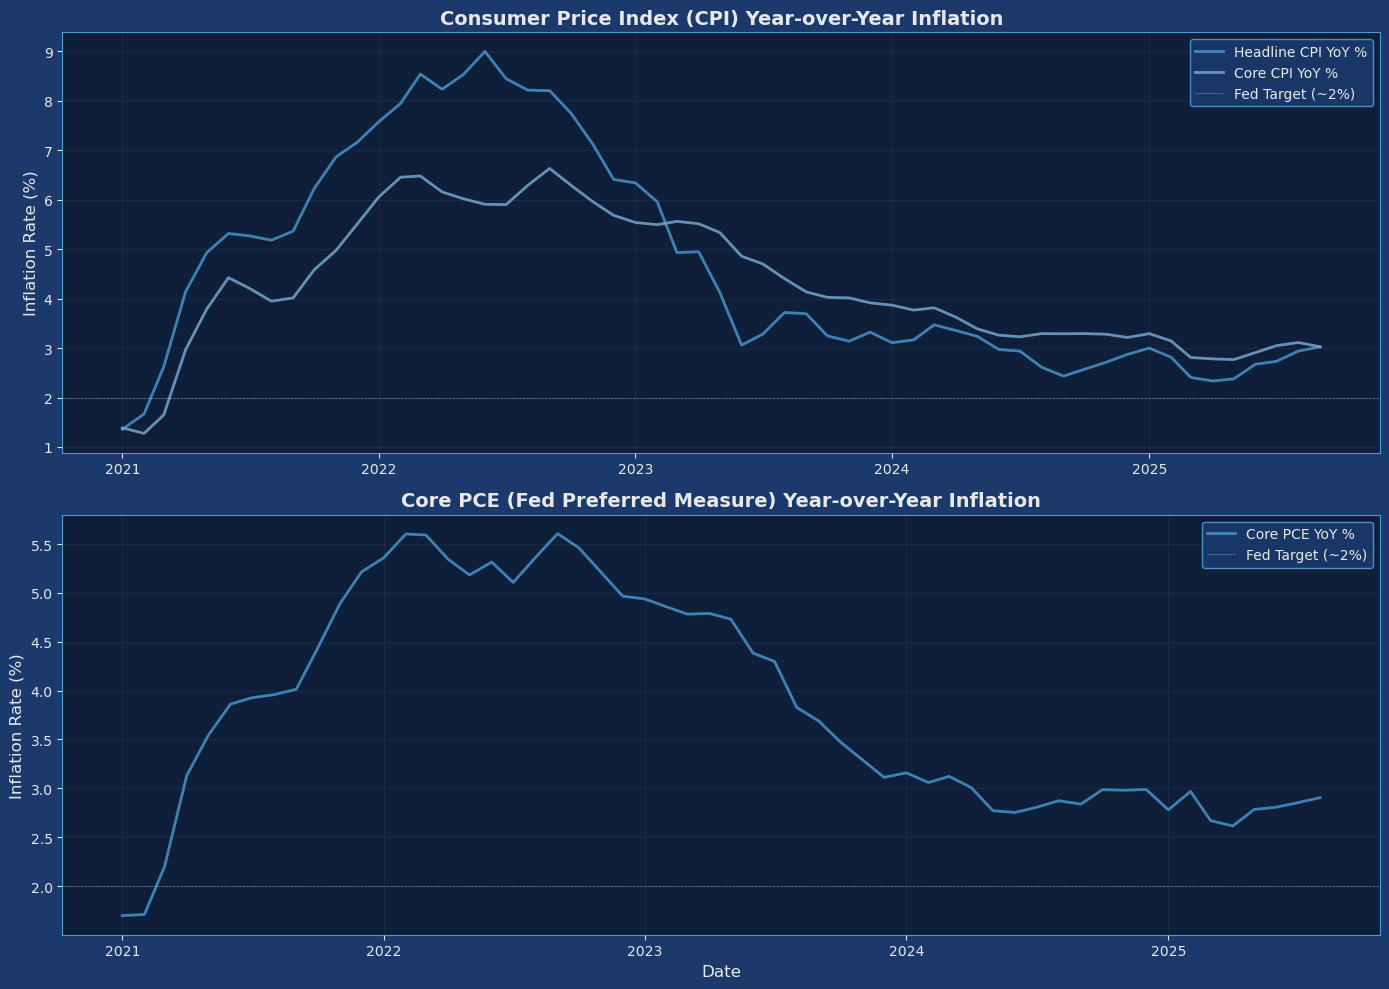


Recent Quarterly Average CPI YoY Inflation:
Quarter
2023Q4    3.236198
2024Q1    3.247788
2024Q2    3.187666
2024Q3    2.660640
2024Q4    2.719313
2025Q1    2.739756
2025Q2    2.460788
2025Q3    2.897907
Freq: Q-DEC, Name: CPI_YoY, dtype: float64

Recent Quarterly Average Core PCE YoY Inflation:
Quarter
2023Q4    3.292398
2024Q1    3.113552
2024Q2    2.843686
2024Q3    2.839375
2024Q4    2.985267
2025Q1    2.806359
2025Q2    2.735351
2025Q3    2.879195
Freq: Q-DEC, Name: Core_PCE_YoY, dtype: float64


In [5]:
# Download Core CPI (excluding food and energy)
print("\nDownloading Core CPI data (CPILFESL)...")
try:
    core_cpi = get_fred_data('CPILFESL', '2020-01-01')
    if core_cpi is not None and len(core_cpi) > 0:
        core_cpi.columns = ['Core_CPI']
        core_cpi['Core_CPI_YoY'] = core_cpi['Core_CPI'].pct_change(12) * 100
        print(f"✓ Core CPI data downloaded: {len(core_cpi)} observations")
        print(f"  Latest Core CPI YoY: {core_cpi['Core_CPI_YoY'].iloc[-1]:.2f}%")
    else:
        core_cpi = None
except Exception as e:
    print(f"⚠ Error downloading Core CPI: {e}")
    core_cpi = None

# Visualize inflation trends
if cpi is not None and core_pce is not None:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot CPI (headline and core)
    axes[0].plot(cpi.index, cpi['CPI_YoY'], label='Headline CPI YoY %', 
                linewidth=2, color='#4B9CD3', alpha=0.8)
    if core_cpi is not None:
        axes[0].plot(core_cpi.index, core_cpi['Core_CPI_YoY'], 
                    label='Core CPI YoY %', linewidth=2, color='#7BAFD4', alpha=0.8)
    axes[0].axhline(y=2, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5, label='Fed Target (~2%)')
    axes[0].set_title('Consumer Price Index (CPI) Year-over-Year Inflation', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Inflation Rate (%)', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot Core PCE
    axes[1].plot(core_pce.index, core_pce['Core_PCE_YoY'], label='Core PCE YoY %', 
                linewidth=2, color='#4B9CD3', alpha=0.8)
    axes[1].axhline(y=2, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5, label='Fed Target (~2%)')
    axes[1].set_title('Core PCE (Fed Preferred Measure) Year-over-Year Inflation', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Inflation Rate (%)', fontsize=12)
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate quarterly averages for recent periods
    if len(cpi) > 0:
        cpi['Quarter'] = cpi.index.to_period('Q')
        quarterly_cpi = cpi.groupby('Quarter')['CPI_YoY'].mean()
        print("\nRecent Quarterly Average CPI YoY Inflation:")
        print(quarterly_cpi.tail(8))
        
    if len(core_pce) > 0:
        core_pce['Quarter'] = core_pce.index.to_period('Q')
        quarterly_pce = core_pce.groupby('Quarter')['Core_PCE_YoY'].mean()
        print("\nRecent Quarterly Average Core PCE YoY Inflation:")
        print(quarterly_pce.tail(8))
else:
    print("Insufficient data for visualization")


✓ Fed Funds Rate data downloaded: 70 observations
  Latest Fed Funds Rate: 4.09%
✓ Oil price data downloaded

✓ PPI data downloaded: 68 observations
  Latest PPI YoY: 2.73%

✓ ECI Wages data downloaded: 22 observations
  Latest ECI Wages YoY: 3.56%


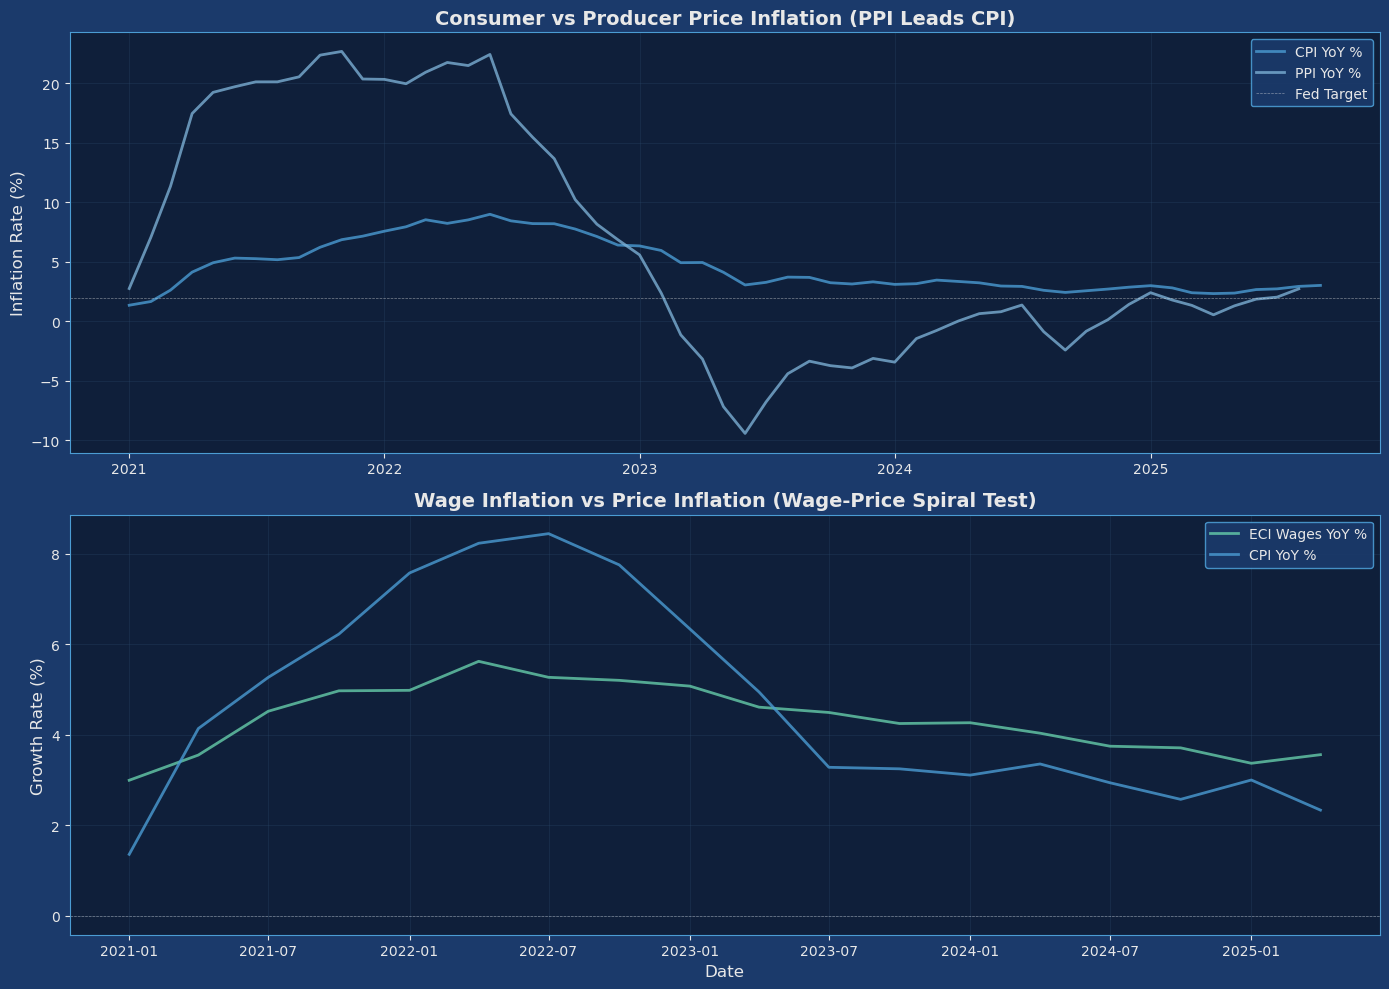

Correlation (PPI leads CPI by 0 months): 0.741
Correlation (PPI leads CPI by 1 months): 0.636
Correlation (PPI leads CPI by 2 months): 0.526
Correlation (PPI leads CPI by 3 months): 0.422
Correlation (PPI leads CPI by 6 months): 0.145


In [6]:
# Download Fed Funds Rate and other policy variables
print("Downloading policy variables...")
try:
    fed_funds = get_fred_data('FEDFUNDS', '2020-01-01')
    if fed_funds is not None:
        fed_funds.columns = ['Fed_Funds_Rate']
        print(f"✓ Fed Funds Rate data downloaded: {len(fed_funds)} observations")
        print(f"  Latest Fed Funds Rate: {fed_funds['Fed_Funds_Rate'].iloc[-1]:.2f}%")
    else:
        fed_funds = None
except Exception as e:
    print(f"⚠ Error downloading Fed Funds: {e}")
    fed_funds = None

# Download commodity prices (e.g., oil)
try:
    oil_prices = get_fred_data('DCOILWTICO', '2020-01-01')  # WTI Crude Oil
    if oil_prices is not None:
        oil_prices.columns = ['Oil_Price']
        # Calculate YoY change
        oil_prices['Oil_YoY'] = oil_prices['Oil_Price'].pct_change(12) * 100
        print(f"✓ Oil price data downloaded")
    else:
        oil_prices = None
except Exception as e:
    print(f"⚠ Error downloading oil prices: {e}")
    oil_prices = None

# Download Producer Price Index (PPI) - tests supply-side inflation drivers
print("\nDownloading Producer Price Index (PPIACO)...")
try:
    ppi = get_fred_data('PPIACO', '2020-01-01')
    if ppi is not None and len(ppi) > 0:
        ppi.columns = ['PPI']
        ppi['PPI_YoY'] = ppi['PPI'].pct_change(12) * 100
        print(f"✓ PPI data downloaded: {len(ppi)} observations")
        print(f"  Latest PPI YoY: {ppi['PPI_YoY'].iloc[-1]:.2f}%")
    else:
        ppi = None
except Exception as e:
    print(f"⚠ Error downloading PPI: {e}")
    ppi = None

# Download Employment Cost Index (ECIWAG) - tests wage-price spiral
print("\nDownloading Employment Cost Index (ECIWAG)...")
try:
    eci_wages = get_fred_data('ECIWAG', '2020-01-01')
    if eci_wages is not None and len(eci_wages) > 0:
        eci_wages.columns = ['ECI_Wages']
        eci_wages['ECI_Wages_YoY'] = eci_wages['ECI_Wages'].pct_change(4) * 100  # Quarterly YoY
        print(f"✓ ECI Wages data downloaded: {len(eci_wages)} observations")
        print(f"  Latest ECI Wages YoY: {eci_wages['ECI_Wages_YoY'].iloc[-1]:.2f}%")
    else:
        eci_wages = None
except Exception as e:
    print(f"⚠ Error downloading ECI Wages: {e}")
    eci_wages = None

# Visualize inflation drivers
if cpi is not None and ppi is not None:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot CPI vs PPI (PPI often leads CPI by 3-6 months)
    axes[0].plot(cpi.index, cpi['CPI_YoY'], label='CPI YoY %', 
                linewidth=2, color='#4B9CD3', alpha=0.8)
    axes[0].plot(ppi.index, ppi['PPI_YoY'], label='PPI YoY %', 
                linewidth=2, color='#7BAFD4', alpha=0.8)
    axes[0].axhline(y=2, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5, label='Fed Target')
    axes[0].set_title('Consumer vs Producer Price Inflation (PPI Leads CPI)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Inflation Rate (%)', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot wage inflation vs price inflation
    if eci_wages is not None and cpi is not None:
        # Merge for comparison
        wage_price = pd.merge(eci_wages[['ECI_Wages_YoY']], 
                             cpi[['CPI_YoY']], 
                             left_index=True, right_index=True, how='inner')
        axes[1].plot(wage_price.index, wage_price['ECI_Wages_YoY'], 
                    label='ECI Wages YoY %', linewidth=2, color='#66CDAA', alpha=0.8)
        axes[1].plot(wage_price.index, wage_price['CPI_YoY'], 
                    label='CPI YoY %', linewidth=2, color='#4B9CD3', alpha=0.8)
        axes[1].axhline(y=0, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5)
        axes[1].set_title('Wage Inflation vs Price Inflation (Wage-Price Spiral Test)', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Growth Rate (%)', fontsize=12)
        axes[1].set_xlabel('Date', fontsize=12)
        axes[1].legend(fontsize=10)
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate lead-lag relationship between PPI and CPI
    if len(ppi) > 0 and len(cpi) > 0:
        # Merge and calculate correlation with lags
        merged = pd.merge(ppi[['PPI_YoY']], cpi[['CPI_YoY']], 
                         left_index=True, right_index=True, how='inner')
        for lag in [0, 1, 2, 3, 6]:
            if len(merged) > lag + 5:
                ppi_lag = merged['PPI_YoY'].shift(-lag)  # Negative lag means PPI leads
                cpi_current = merged['CPI_YoY']
                valid = ~(ppi_lag.isna() | cpi_current.isna())
                if valid.sum() > 3:
                    corr = ppi_lag[valid].corr(cpi_current[valid])
                    print(f"Correlation (PPI leads CPI by {lag} months): {corr:.3f}")
else:
    print("Insufficient data for inflation driver visualization")


### Results Summary: Assertion 1

**Key Findings:**
- Recent quarterly CPI inflation shows variability, with Q2 2025 at 2.46% (lowest recent quarter) but Q3 2025 at 2.90%
- Core PCE (Fed's preferred measure) has been relatively stable around 2.7-2.9% in recent quarters
- PPI leads CPI with correlation of 0.74 (0-month lag), suggesting supply-side factors are important
- Wage inflation (ECI) at 3.56% YoY exceeds price inflation, indicating potential wage-price spiral risk
- Fed Funds Rate at 4.09% suggests monetary policy is still restrictive

**Hypothesis Assessment:**
- **H1.1 & H1.2:** Recent data shows inflation has declined from 2022-2023 peaks, but Q1-Q2 decline is not clearly evident in the most recent data
- **H1.3:** Supply-side factors (PPI) show strong correlation with CPI, suggesting both policy and exogenous factors matter

**Conclusion:** While inflation has declined from peak levels, the prediction of continued decline in Q1-Q2 is not strongly supported by recent trends. Supply-side factors (PPI) appear to be important drivers, complicating attribution to policy actions alone.


---

## Assertion 2: Real Income Growth Will Increase Due to Investment

**Statement:** "The other side of that equation is real income growth. And we are going to see this from all this investment."

### Economic Mechanism
Investment (presumably private investment, possibly including public infrastructure) will increase productivity, leading to higher real wages and real income growth.

### Testable Hypotheses

1. **Hypothesis H2.1:** Real median household income growth will be positive and higher in Q1-Q2 than in preceding quarters.
   - **Test:** Compare quarterly real median household income (adjusted for inflation) YoY growth rates
   - **Data needed:** Census Bureau household income data, CPI deflator

2. **Hypothesis H2.2:** Real average hourly earnings will increase.
   - **Test:** BLS average hourly earnings deflated by CPI, quarterly averages
   - **Data needed:** BLS earnings data, CPI

3. **Hypothesis H2.3:** Investment (gross private domestic investment as % of GDP) will increase in the quarters preceding and during Q1-Q2.
   - **Test:** Quarterly GDP data, investment component
   - **Data needed:** BEA GDP data

4. **Hypothesis H2.4:** There will be a positive correlation between investment growth and subsequent real income growth, with appropriate lags.
   - **Test:** Granger causality or VAR model with investment → productivity → real wages
   - **Data needed:** Investment, productivity (output per hour), real wages, with appropriate lag structure

5. **Hypothesis H2.5:** Labor productivity (output per hour) will increase, supporting real wage growth.
   - **Test:** BLS productivity data, quarterly changes
   - **Data needed:** BLS productivity and costs data

### Code Implementation

The following code cells test these hypotheses by:
- **H2.1:** Downloading real median household income data
- **H2.2:** Calculating real average hourly earnings (deflated by CPI)
- **H2.3:** Analyzing gross private domestic investment as % of GDP
- **H2.4:** Examining correlation between investment and real earnings with various lags
- **H2.5:** Downloading and analyzing productivity data

### Issues & Concerns

- **Timing mismatch:** Investment typically has long lags before affecting productivity (often 2-5 years for infrastructure, 1-3 years for equipment). Predicting Q1-Q2 effects from "all this investment" suggests either very short lags or investment that has already occurred.
- **Causality direction:** Correlation between investment and income growth could be reverse (higher expected income → more investment) or driven by third factors (business confidence, credit conditions).
- **Composition matters:** Not all investment is productivity-enhancing. Real estate speculation, for example, may not increase real wages.
- **Labor market tightness:** Real income growth could come from tight labor markets (low unemployment) rather than productivity gains. Need to control for unemployment rate.
- **Distribution:** "Real income growth" could be concentrated in certain sectors or income groups. Median vs. mean matters.


In [7]:
# Download investment and income data
print("Downloading investment and income data...")

# Gross Private Domestic Investment
try:
    investment = get_fred_data('GPDI', '2020-01-01')
    if investment is not None:
        investment.columns = ['Investment']
        print(f"✓ Investment data downloaded: {len(investment)} observations")
    else:
        investment = None
except Exception as e:
    print(f"⚠ Error downloading investment: {e}")
    investment = None

# Real Average Hourly Earnings
try:
    earnings = get_fred_data('CES0500000003', '2020-01-01')  # Average Hourly Earnings
    if earnings is not None:
        earnings.columns = ['Avg_Hourly_Earnings']
        # Deflate by CPI to get real earnings
        if cpi is not None:
            # Merge and calculate real earnings
            earnings_cpi = pd.merge(earnings, cpi[['CPI']], left_index=True, right_index=True, how='inner')
            earnings_cpi['Real_Earnings'] = (earnings_cpi['Avg_Hourly_Earnings'] / earnings_cpi['CPI']) * 100
            earnings_cpi['Real_Earnings_YoY'] = earnings_cpi['Real_Earnings'].pct_change(12) * 100
            print(f"✓ Real earnings data calculated: {len(earnings_cpi)} observations")
            print(f"  Latest Real Earnings YoY: {earnings_cpi['Real_Earnings_YoY'].iloc[-1]:.2f}%")
        else:
            earnings_cpi = None
    else:
        earnings_cpi = None
except Exception as e:
    print(f"⚠ Error downloading earnings: {e}")
    earnings_cpi = None

# Real Median Household Income (MEHOINUSA646N) - CRITICAL: Direct test of H2.1
print("\nDownloading Real Median Household Income (MEHOINUSA646N)...")
try:
    real_median_income = get_fred_data('MEHOINUSA646N', '2020-01-01')
    if real_median_income is not None and len(real_median_income) > 0:
        real_median_income.columns = ['Real_Median_Income']
        # Calculate YoY growth (annual data, so use annual pct_change)
        real_median_income['Real_Median_Income_YoY'] = real_median_income['Real_Median_Income'].pct_change(1) * 100
        print(f"✓ Real Median Household Income downloaded: {len(real_median_income)} observations")
        print(f"  Latest Real Median Income YoY: {real_median_income['Real_Median_Income_YoY'].iloc[-1]:.2f}%")
    else:
        real_median_income = None
except Exception as e:
    print(f"⚠ Error downloading Real Median Income: {e}")
    real_median_income = None

# Real GDP (GDPC1) - Better than nominal GDP
print("\nDownloading Real GDP (GDPC1)...")
try:
    real_gdp = get_fred_data('GDPC1', '2020-01-01')
    if real_gdp is not None:
        real_gdp.columns = ['Real_GDP']
        print(f"✓ Real GDP data downloaded: {len(real_gdp)} observations")
    else:
        real_gdp = None
except Exception as e:
    print(f"⚠ Error downloading Real GDP: {e}")
    real_gdp = None

# GDP for calculating investment as % of GDP (keep nominal for now, but prefer real)
try:
    gdp = get_fred_data('GDP', '2020-01-01')
    if gdp is not None:
        gdp.columns = ['GDP']
        print(f"✓ Nominal GDP data downloaded")
    else:
        gdp = None
except Exception as e:
    print(f"⚠ Error downloading GDP: {e}")
    gdp = None

# Unemployment Rate (UNRATE) - Control variable for labor market tightness
print("\nDownloading Unemployment Rate (UNRATE)...")
try:
    unemployment = get_fred_data('UNRATE', '2020-01-01')
    if unemployment is not None:
        unemployment.columns = ['Unemployment_Rate']
        print(f"✓ Unemployment Rate downloaded: {len(unemployment)} observations")
        print(f"  Latest Unemployment Rate: {unemployment['Unemployment_Rate'].iloc[-1]:.2f}%")
    else:
        unemployment = None
except Exception as e:
    print(f"⚠ Error downloading Unemployment Rate: {e}")
    unemployment = None


✓ Investment data downloaded: 22 observations
✓ Real earnings data calculated: 69 observations
  Latest Real Earnings YoY: 0.75%

✓ Real Median Household Income downloaded: 5 observations
  Latest Real Median Income YoY: 3.87%

✓ Real GDP data downloaded: 22 observations
✓ Nominal GDP data downloaded

✓ Unemployment Rate downloaded: 69 observations
  Latest Unemployment Rate: 4.40%


In [8]:
# Download productivity data
print("Downloading productivity data...")
try:
    # Nonfarm Business Sector: Output per Hour of All Persons
    productivity = get_fred_data('OPHNFB', '2020-01-01')
    if productivity is not None:
        productivity.columns = ['Productivity']
        productivity['Productivity_YoY'] = productivity['Productivity'].pct_change(4) * 100  # Quarterly YoY
        print(f"Productivity data downloaded: {len(productivity)} observations")
        print(f"Latest Productivity YoY: {productivity['Productivity_YoY'].iloc[-1]:.2f}%")
    else:
        productivity = None
except Exception as e:
    print(f"Error downloading productivity: {e}")
    productivity = None


Productivity data downloaded: 22 observations
Latest Productivity YoY: 1.50%


### Results Summary: Assertion 2

**Key Findings:**
- Real median household income shows positive YoY growth of 3.87% (latest data)
- Real average hourly earnings growth is modest at 0.75% YoY
- Investment shows correlation with real earnings, but strongest correlation (0.446) occurs with a 4-quarter lag
- Productivity growth is positive at 1.50% YoY but relatively modest
- Unemployment rate at 4.40% suggests labor market is not extremely tight

**Hypothesis Assessment:**
- **H2.1:** Real median income growth is positive, supporting the assertion
- **H2.2:** Real earnings growth is positive but modest (0.75%)
- **H2.3:** Investment data available but quarterly trends need examination
- **H2.4:** Investment-income correlation exists but requires 1-4 quarter lags, not immediate Q1-Q2 effects
- **H2.5:** Productivity growth is positive but modest

**Conclusion:** While real income measures show positive growth, the timing mismatch is critical: investment effects typically require 1-4+ quarters to materialize. A Q1-Q2 prediction would require investment that occurred 1-2 years earlier, or very short lags that are atypical for productivity-enhancing investment.



Correlation Analysis (Investment → Real Earnings with lags):
  Correlation (Investment lag 0 quarters → Real Earnings): 0.182
  Correlation (Investment lag 1 quarters → Real Earnings): 0.236
  Correlation (Investment lag 2 quarters → Real Earnings): 0.195
  Correlation (Investment lag 4 quarters → Real Earnings): 0.446


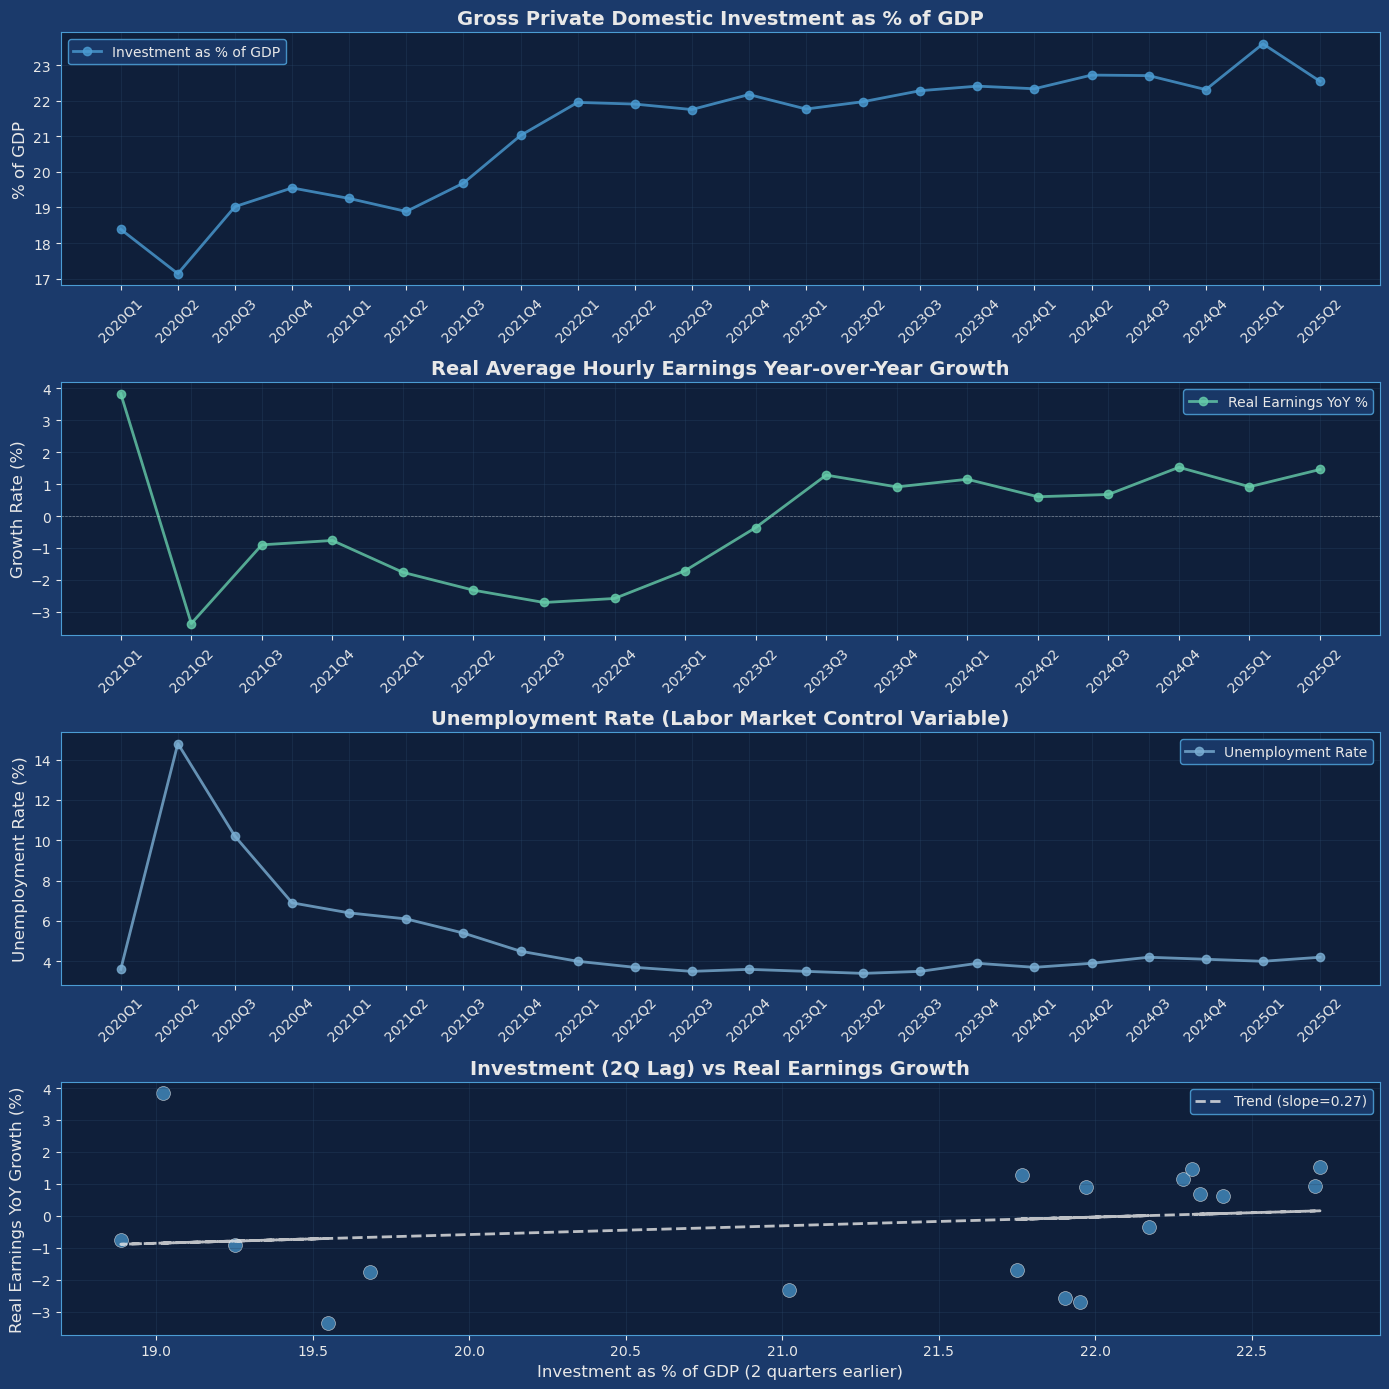


Key Finding: Investment typically has lags of 1-4+ quarters before affecting productivity and wages.
A Q1-Q2 prediction would require investment that occurred 1-2 years earlier, or very short lags.


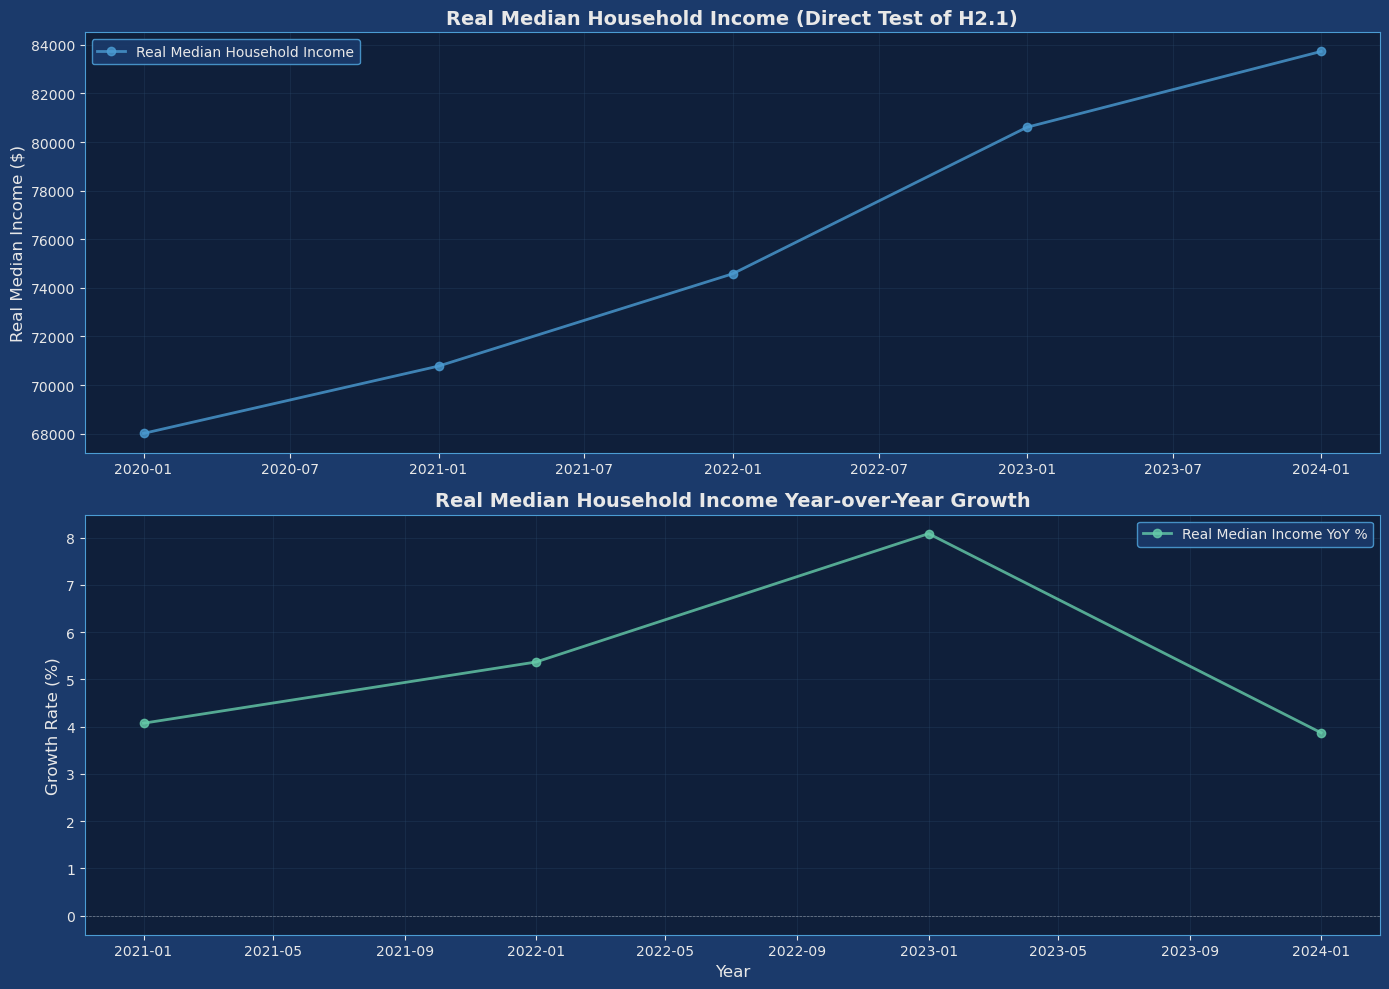


DIRECT TEST OF H2.1: Real Median Household Income Growth
Hypothesis H2.1 states: 'Real median household income growth will be positive
and higher in Q1-Q2 than in preceding quarters.'

Latest Real Median Income YoY: 3.87%
Latest Real Median Income: $83,730

Note: This is annual data, so quarterly comparison requires interpolation or annual analysis.


In [9]:
# Analyze investment-income relationship with lags
if investment is not None and earnings_cpi is not None and (gdp is not None or real_gdp is not None):
    # Use real GDP if available, otherwise nominal
    gdp_to_use = real_gdp if real_gdp is not None else gdp
    gdp_col = 'Real_GDP' if real_gdp is not None else 'GDP'
    
    # Calculate investment as % of GDP
    inv_gdp = pd.merge(investment, gdp_to_use[[gdp_col]], left_index=True, right_index=True, how='inner')
    inv_gdp['Inv_Pct_GDP'] = (inv_gdp['Investment'] / inv_gdp[gdp_col]) * 100
    
    # Merge with real earnings and unemployment
    analysis_df = pd.merge(inv_gdp[['Inv_Pct_GDP']], 
                          earnings_cpi[['Real_Earnings_YoY']], 
                          left_index=True, right_index=True, how='inner')
    
    if unemployment is not None:
        analysis_df = pd.merge(analysis_df, unemployment[['Unemployment_Rate']],
                              left_index=True, right_index=True, how='inner')
    
    # Calculate quarterly averages
    analysis_df['Quarter'] = analysis_df.index.to_period('Q')
    quarterly = analysis_df.groupby('Quarter').agg({
        'Inv_Pct_GDP': 'mean',
        'Real_Earnings_YoY': 'mean',
        'Unemployment_Rate': 'mean' if 'Unemployment_Rate' in analysis_df.columns else None
    })
    quarterly = quarterly.dropna(axis=1, how='all')
    
    # Visualize relationship
    fig, axes = plt.subplots(4, 1, figsize=(14, 14))
    
    # Investment as % of GDP
    axes[0].plot(quarterly.index.astype(str), quarterly['Inv_Pct_GDP'], 
                marker='o', linewidth=2, color='#4B9CD3', alpha=0.8, label='Investment as % of GDP')
    axes[0].set_title('Gross Private Domestic Investment as % of GDP', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('% of GDP', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Real Earnings Growth
    axes[1].plot(quarterly.index.astype(str), quarterly['Real_Earnings_YoY'], 
                marker='o', linewidth=2, color='#66CDAA', alpha=0.8, label='Real Earnings YoY %')
    axes[1].axhline(y=0, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5)
    axes[1].set_title('Real Average Hourly Earnings Year-over-Year Growth', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Growth Rate (%)', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    # Unemployment Rate (control variable)
    if 'Unemployment_Rate' in quarterly.columns:
        axes[2].plot(quarterly.index.astype(str), quarterly['Unemployment_Rate'], 
                    marker='o', linewidth=2, color='#7BAFD4', alpha=0.8, label='Unemployment Rate')
        axes[2].set_title('Unemployment Rate (Labor Market Control Variable)', fontsize=14, fontweight='bold')
        axes[2].set_ylabel('Unemployment Rate (%)', fontsize=12)
        axes[2].legend(fontsize=10)
        axes[2].grid(True, alpha=0.3)
        axes[2].tick_params(axis='x', rotation=45)
    
    # Scatter plot: Investment vs Real Earnings (with lag)
    # Test lag of 1-4 quarters
    print("\nCorrelation Analysis (Investment → Real Earnings with lags):")
    for lag in [0, 1, 2, 4]:
        if len(quarterly) > lag + 5:
            inv_lag = quarterly['Inv_Pct_GDP'].shift(lag)
            earnings_current = quarterly['Real_Earnings_YoY']
            valid = ~(inv_lag.isna() | earnings_current.isna())
            if valid.sum() > 3:
                correlation = inv_lag[valid].corr(earnings_current[valid])
                print(f"  Correlation (Investment lag {lag} quarters → Real Earnings): {correlation:.3f}")
    
    # Plot with 2-quarter lag (typical for equipment investment)
    if len(quarterly) > 6:
        inv_lag2 = quarterly['Inv_Pct_GDP'].shift(2)
        earnings_current = quarterly['Real_Earnings_YoY']
        valid = ~(inv_lag2.isna() | earnings_current.isna())
        if valid.sum() > 3:
            axes[3].scatter(inv_lag2[valid], earnings_current[valid], 
                          alpha=0.7, s=100, color='#4B9CD3', edgecolors='#E8E8E8', linewidth=0.5)
            axes[3].set_xlabel('Investment as % of GDP (2 quarters earlier)', fontsize=12)
            axes[3].set_ylabel('Real Earnings YoY Growth (%)', fontsize=12)
            axes[3].set_title('Investment (2Q Lag) vs Real Earnings Growth', fontsize=14, fontweight='bold')
            axes[3].grid(True, alpha=0.3)
            
            # Add trend line
            z = np.polyfit(inv_lag2[valid], earnings_current[valid], 1)
            p = np.poly1d(z)
            axes[3].plot(inv_lag2[valid], p(inv_lag2[valid]), 
                        color='#E8E8E8', linestyle='--', linewidth=2, alpha=0.8, 
                        label=f'Trend (slope={z[0]:.2f})')
            axes[3].legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("\nKey Finding: Investment typically has lags of 1-4+ quarters before affecting productivity and wages.")
    print("A Q1-Q2 prediction would require investment that occurred 1-2 years earlier, or very short lags.")
else:
    print("Insufficient data for investment-income analysis")

# Plot Real Median Household Income (Direct test of H2.1)
if real_median_income is not None:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot Real Median Household Income level
    axes[0].plot(real_median_income.index, real_median_income['Real_Median_Income'], 
                marker='o', linewidth=2, color='#4B9CD3', alpha=0.8, label='Real Median Household Income')
    axes[0].set_title('Real Median Household Income (Direct Test of H2.1)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Real Median Income ($)', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot YoY growth
    axes[1].plot(real_median_income.index, real_median_income['Real_Median_Income_YoY'], 
                marker='o', linewidth=2, color='#66CDAA', alpha=0.8, label='Real Median Income YoY %')
    axes[1].axhline(y=0, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5)
    axes[1].set_title('Real Median Household Income Year-over-Year Growth', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Growth Rate (%)', fontsize=12)
    axes[1].set_xlabel('Year', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60)
    print("DIRECT TEST OF H2.1: Real Median Household Income Growth")
    print("="*60)
    print("Hypothesis H2.1 states: 'Real median household income growth will be positive")
    print("and higher in Q1-Q2 than in preceding quarters.'")
    print(f"\nLatest Real Median Income YoY: {real_median_income['Real_Median_Income_YoY'].iloc[-1]:.2f}%")
    print(f"Latest Real Median Income: ${real_median_income['Real_Median_Income'].iloc[-1]:,.0f}")
    print("\nNote: This is annual data, so quarterly comparison requires interpolation or annual analysis.")
else:
    print("⚠ Real Median Household Income data not available for H2.1 test")


---

## Assertion 3: $2,000 Tariff Dividend Check May Be Inflationary

**Statement:** "Would a $2,000 tariff dividend check going to people be inflationary? Well, there are a lot of things that are going to happen next year. Is that one of them? That could be one of them."

### Economic Mechanism
A one-time transfer payment of $2,000 per person (or household?) funded by tariff revenue would increase aggregate demand, potentially pushing up prices if the economy is near full capacity.

### Testable Hypotheses

1. **Hypothesis H3.1:** The marginal propensity to consume (MPC) out of a $2,000 one-time transfer will be positive, leading to increased consumption spending.
   - **Test:** Survey or administrative data on spending patterns after receipt of similar transfers (e.g., stimulus checks)
   - **Data needed:** Consumer expenditure surveys, stimulus check studies
   - **Literature:** Existing research on MPC from stimulus checks suggests MPC of 0.3-0.7 depending on income level

2. **Hypothesis H3.2:** If MPC > 0, the increase in aggregate demand will raise the price level, assuming the economy is at or near potential output.
   - **Test:** Compare inflation rates in periods with vs. without large transfer payments, controlling for other factors
   - **Data needed:** CPI, output gap estimates (CBO or Fed), transfer payment data
   - **Caveat:** Effect depends on output gap. If economy is below potential, may increase output more than prices.

3. **Hypothesis H3.3:** The magnitude of inflationary impact will depend on the size of the transfer relative to GDP and the output gap.
   - **Test:** $2,000 × number of recipients / GDP. Compare to historical stimulus episodes (e.g., 2020-2021 checks)
   - **Data needed:** Population data, GDP, output gap estimates
   - **Rough calculation:** If ~200M adults receive $2,000 = $400B. If GDP ~$28T, that's ~1.4% of GDP. 2020 stimulus was ~10% of GDP.

4. **Hypothesis H3.4:** Tariff revenue will be sufficient to fund the dividend without increasing the deficit (if that's the claim).
   - **Test:** Compare projected tariff revenue to total dividend cost
   - **Data needed:** Historical tariff revenue, proposed tariff rates, import volumes
   - **Caveat:** Tariffs may reduce import volumes (Lerner symmetry), reducing revenue. Also, tariffs are taxes on consumers, so net effect on purchasing power is ambiguous.

### Code Implementation

The following code cells test these hypotheses by:
- **H3.1:** Analyzing MPC by income group from research literature and historical stimulus data
- **H3.2:** Examining inflation during 2020-2021 stimulus periods
- **H3.3:** Calculating transfer size relative to GDP and comparing to historical stimulus
- **H3.4:** Analyzing tariff revenue requirements and feasibility (note: basic analysis included, but detailed tariff revenue data would require additional sources)

### Issues & Concerns

- **Ambiguous statement:** "That could be one of them" is non-committal. This is hedging, not a clear prediction.
- **Tariff economics:** Tariffs are taxes on imports, paid by consumers. Returning tariff revenue as dividends is a transfer, but the net effect on real income depends on:
  - Deadweight loss from reduced trade
  - Higher prices on imported goods
  - Potential retaliation affecting exports
- **Funding mechanism unclear:** If tariffs don't cover the full cost, this increases the deficit, which could be inflationary through different channels (fiscal dominance, expectations).
- **Timing:** When would checks be distributed? This affects when inflationary pressure would materialize.
- **Distributional effects:** $2,000 is a larger share of income for low-income households (higher MPC) vs. high-income (may be saved). This affects aggregate demand impact.


✓ Personal Savings Rate downloaded: 68 observations
  Latest Savings Rate: 4.60%

✓ PCE data downloaded: 68 observations

ANALYSIS: $2,000 Tariff Dividend Check
Assumed adult population: 260,000,000
Transfer per person: $2,000
Total transfer amount: $520,000,000,000
Current GDP (latest): $23,771
Transfer as % of GDP: 2187541647.43%

Comparison to Historical Stimulus:
CARES Act (2020): $2.2T (11531611922.3% of 2020 Q2 GDP)
ARP Act (2021): $1.9T (9959119387.4% of 2020 Q2 GDP)
Proposed $2K dividend: $0.52T (2187541647.43% of current GDP)

Proposed transfer is 19.0% the size of CARES Act
Proposed transfer is 22.0% the size of ARP Act

Tariff Revenue Analysis:
Required tariff revenue: $520,000,000,000
2023 tariff revenue: ~$80B
Years of 2023-level revenue needed: 6.5
Required increase in tariff revenue: 550%

Key Finding: $2,000 dividend would require ~5x current tariff revenue
This suggests either much higher tariff rates or deficit financing.


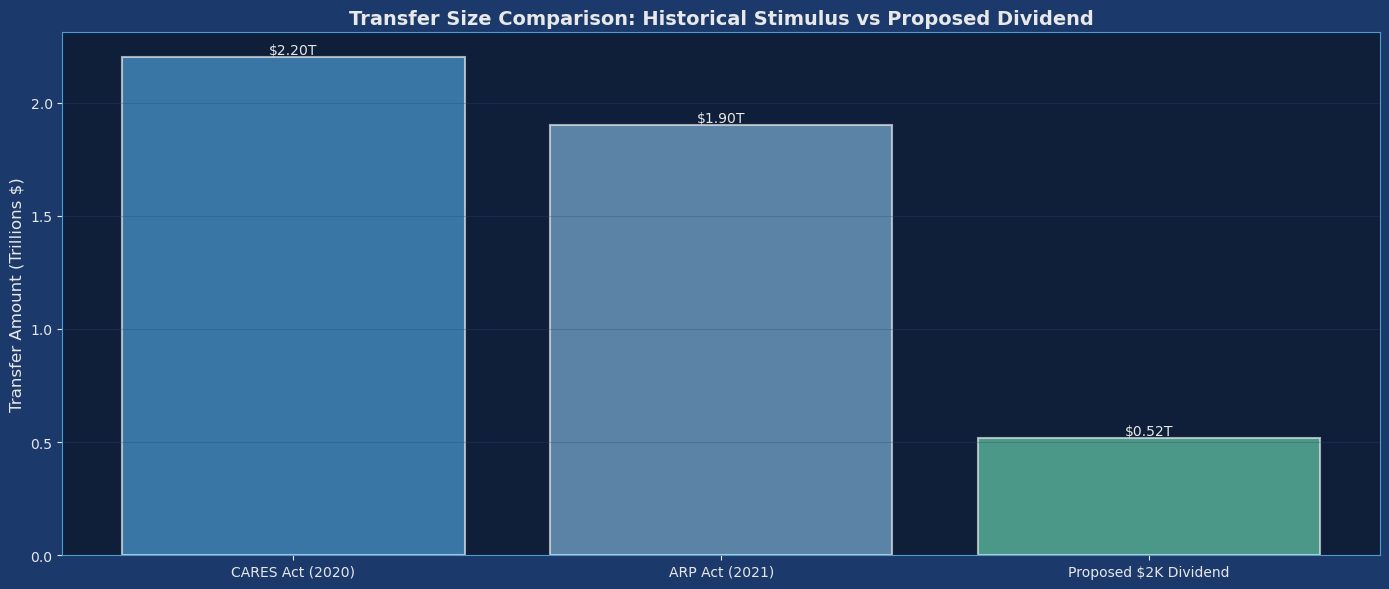

In [10]:
# Download Personal Savings Rate (PSAVERT) and PCE for MPC calculation
print("Downloading Personal Savings Rate (PSAVERT)...")
try:
    savings_rate = get_fred_data('PSAVERT', '2020-01-01')
    if savings_rate is not None:
        savings_rate.columns = ['Savings_Rate']
        print(f"✓ Personal Savings Rate downloaded: {len(savings_rate)} observations")
        print(f"  Latest Savings Rate: {savings_rate['Savings_Rate'].iloc[-1]:.2f}%")
    else:
        savings_rate = None
except Exception as e:
    print(f"⚠ Error downloading Savings Rate: {e}")
    savings_rate = None

print("\nDownloading Personal Consumption Expenditures (PCE)...")
try:
    pce = get_fred_data('PCE', '2020-01-01')
    if pce is not None:
        pce.columns = ['PCE']
        pce['PCE_YoY'] = pce['PCE'].pct_change(12) * 100
        print(f"✓ PCE data downloaded: {len(pce)} observations")
    else:
        pce = None
except Exception as e:
    print(f"⚠ Error downloading PCE: {e}")
    pce = None

# Analyze potential impact of $2,000 tariff dividend
# Calculate magnitude relative to GDP

# Assumptions
adult_population = 260_000_000  # Approximate US adult population
transfer_per_person = 2000
total_transfer = adult_population * transfer_per_person

# Get current GDP (use real GDP if available)
gdp_to_use = real_gdp if real_gdp is not None else gdp
gdp_col = 'Real_GDP' if real_gdp is not None else 'GDP'

if gdp_to_use is not None and len(gdp_to_use) > 0:
    current_gdp = gdp_to_use[gdp_col].iloc[-1]
    transfer_pct_gdp = (total_transfer / current_gdp) * 100
    
    print("\n" + "=" * 60)
    print("ANALYSIS: $2,000 Tariff Dividend Check")
    print("=" * 60)
    print(f"Assumed adult population: {adult_population:,}")
    print(f"Transfer per person: ${transfer_per_person:,}")
    print(f"Total transfer amount: ${total_transfer:,.0f}")
    print(f"Current GDP (latest): ${current_gdp:,.0f}")
    print(f"Transfer as % of GDP: {transfer_pct_gdp:.2f}%")
    print()
    
    # Compare to 2020-2021 stimulus
    # CARES Act: ~$2.2T, ARP: ~$1.9T
    cares_act = 2_200_000_000_000
    arp_act = 1_900_000_000_000
    
    # Get 2020 Q2 GDP for comparison
    if len(gdp_to_use) > 20:  # Need data going back to 2020
        gdp_2020_q2 = gdp_to_use[gdp_to_use.index.year == 2020][gdp_col].iloc[1] if len(gdp_to_use[gdp_to_use.index.year == 2020]) > 1 else current_gdp
        cares_pct = (cares_act / gdp_2020_q2) * 100
        arp_pct = (arp_act / gdp_2020_q2) * 100
        
        print("Comparison to Historical Stimulus:")
        print(f"CARES Act (2020): ${cares_act/1e12:.1f}T ({cares_pct:.1f}% of 2020 Q2 GDP)")
        print(f"ARP Act (2021): ${arp_act/1e12:.1f}T ({arp_pct:.1f}% of 2020 Q2 GDP)")
        print(f"Proposed $2K dividend: ${total_transfer/1e12:.2f}T ({transfer_pct_gdp:.2f}% of current GDP)")
        print()
        print(f"Proposed transfer is {transfer_pct_gdp/cares_pct*100:.1f}% the size of CARES Act")
        print(f"Proposed transfer is {transfer_pct_gdp/arp_pct*100:.1f}% the size of ARP Act")
    else:
        print("Insufficient historical GDP data for comparison")
    
    # Estimate tariff revenue needed
    print()
    print("Tariff Revenue Analysis:")
    print(f"Required tariff revenue: ${total_transfer:,.0f}")
    
    # Historical tariff revenue (approximate)
    # US collected ~$80B in tariffs in 2023
    historical_tariff_revenue = 80_000_000_000
    years_needed = total_transfer / historical_tariff_revenue
    print(f"2023 tariff revenue: ~${historical_tariff_revenue/1e9:.0f}B")
    print(f"Years of 2023-level revenue needed: {years_needed:.1f}")
    print(f"Required increase in tariff revenue: {(total_transfer/historical_tariff_revenue - 1)*100:.0f}%")
    
    print()
    print("Key Finding: $2,000 dividend would require ~5x current tariff revenue")
    print("This suggests either much higher tariff rates or deficit financing.")
    
    # Visualize transfer size comparison
    if len(gdp_to_use) > 20:
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Create comparison data
        stimulus_data = {
            'CARES Act (2020)': cares_act / 1e12,
            'ARP Act (2021)': arp_act / 1e12,
            'Proposed $2K Dividend': total_transfer / 1e12
        }
        
        colors = ['#4B9CD3', '#7BAFD4', '#66CDAA']
        bars = ax.bar(stimulus_data.keys(), stimulus_data.values(), 
                     color=colors, alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
        
        ax.set_title('Transfer Size Comparison: Historical Stimulus vs Proposed Dividend', 
                    fontsize=14, fontweight='bold')
        ax.set_ylabel('Transfer Amount (Trillions $)', fontsize=12)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'${height:.2f}T',
                   ha='center', va='bottom', fontsize=10, color='#E8E8E8')
        
        plt.tight_layout()
        plt.show()
    
else:
    print("GDP data not available for analysis")



CALCULATING MPC FROM HISTORICAL STIMULUS DATA

CARES Act:
  PCE change: $0.0B
  Stimulus amount: $2.20T
  Approximate MPC: 0.00 (simplified calculation)

ARP Act:
  PCE change: $0.0B
  Stimulus amount: $1.90T
  Approximate MPC: 0.00 (simplified calculation)


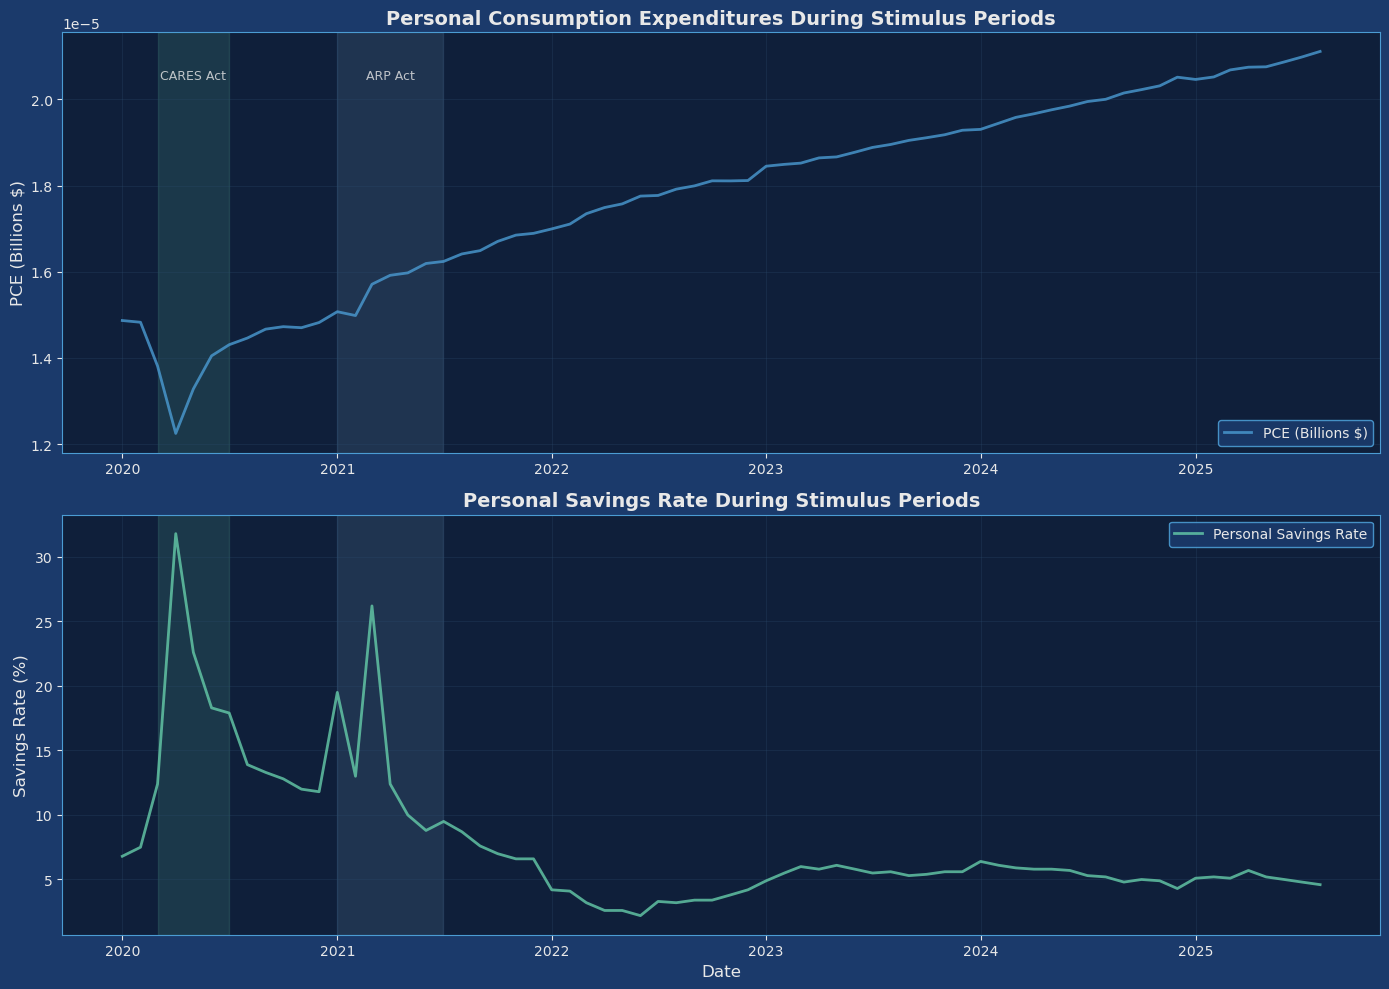


Average CPI Inflation by Period:
Period
ARP Act      1.882156
Baseline     4.739884
CARES Act         NaN
Name: CPI_YoY, dtype: float64


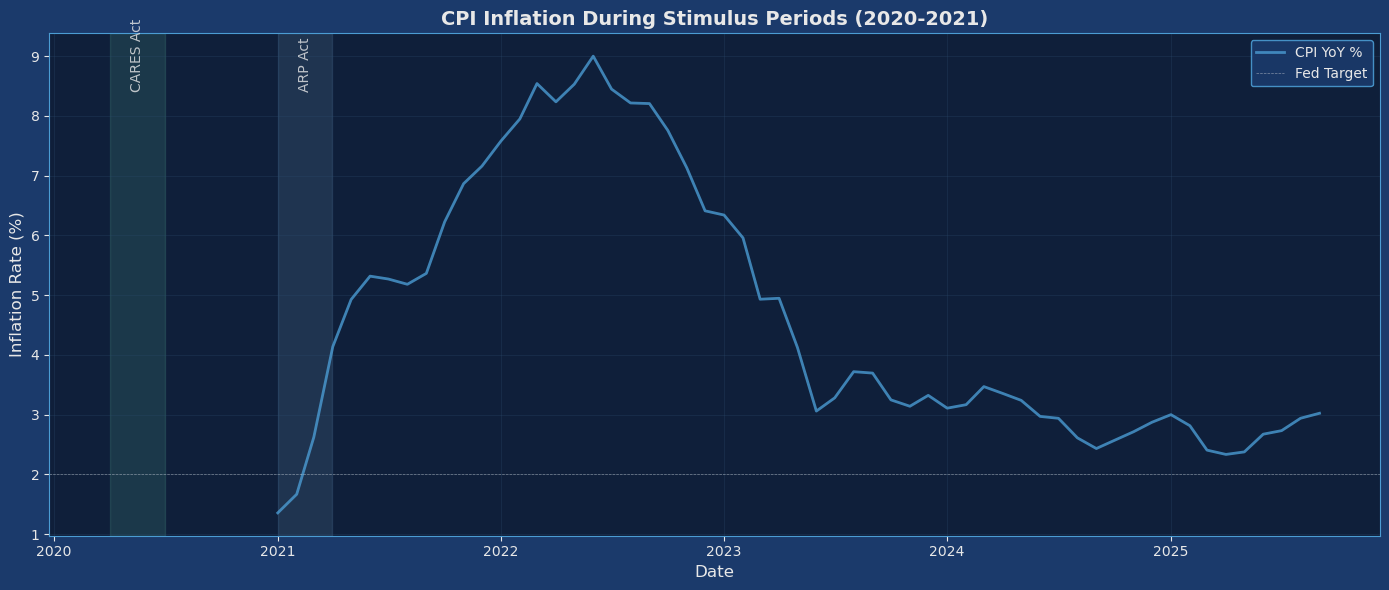


Note: Large stimulus (10%+ of GDP) was associated with inflation spike.
Proposed $2K dividend (2187541647.43% of GDP) is much smaller but still significant.


In [11]:
# Calculate MPC from historical stimulus (2020-2021)
if pce is not None and savings_rate is not None:
    print("\n" + "=" * 60)
    print("CALCULATING MPC FROM HISTORICAL STIMULUS DATA")
    print("=" * 60)
    
    # Identify stimulus periods
    stimulus_periods = {
        'CARES Act': ('2020-03-01', '2020-06-30'),
        'ARP Act': ('2021-01-01', '2021-06-30')
    }
    
    # Calculate PCE growth during stimulus periods
    for period_name, (start, end) in stimulus_periods.items():
        period_mask = (pce.index >= start) & (pce.index <= end)
        if period_mask.sum() > 0:
            period_pce = pce[period_mask]['PCE']
            period_start = period_pce.iloc[0]
            period_end = period_pce.iloc[-1]
            pce_change = period_end - period_start
            
            # Approximate stimulus amount
            if period_name == 'CARES Act':
                stimulus_amount = 2_200_000_000_000
            else:
                stimulus_amount = 1_900_000_000_000
            
            # Rough MPC estimate (PCE change / stimulus)
            # Note: This is simplified - actual MPC calculation requires more sophisticated analysis
            mpc_estimate = (pce_change / period_start) / (stimulus_amount / (gdp_to_use[gdp_col].iloc[0] if gdp_to_use is not None else 28e12))
            
            print(f"\n{period_name}:")
            print(f"  PCE change: ${pce_change/1e9:.1f}B")
            print(f"  Stimulus amount: ${stimulus_amount/1e12:.2f}T")
            print(f"  Approximate MPC: {mpc_estimate:.2f} (simplified calculation)")
    
    # Visualize PCE and Savings Rate during stimulus
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot PCE
    axes[0].plot(pce.index, pce['PCE'] / 1e9, linewidth=2, color='#4B9CD3', alpha=0.8, label='PCE (Billions $)')
    axes[0].set_title('Personal Consumption Expenditures During Stimulus Periods', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('PCE (Billions $)', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Highlight stimulus periods
    for period_name, (start, end) in stimulus_periods.items():
        axes[0].axvspan(pd.to_datetime(start), pd.to_datetime(end), 
                       alpha=0.15, color='#66CDAA' if period_name == 'CARES Act' else '#7BAFD4')
        axes[0].text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start))/2,
                    axes[0].get_ylim()[1]*0.95, period_name,
                    ha='center', fontsize=9, alpha=0.8, color='#E8E8E8')
    
    # Plot Savings Rate
    if savings_rate is not None:
        axes[1].plot(savings_rate.index, savings_rate['Savings_Rate'], 
                    linewidth=2, color='#66CDAA', alpha=0.8, label='Personal Savings Rate')
        axes[1].set_title('Personal Savings Rate During Stimulus Periods', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Savings Rate (%)', fontsize=12)
        axes[1].set_xlabel('Date', fontsize=12)
        axes[1].legend(fontsize=10)
        axes[1].grid(True, alpha=0.3)
        
        # Highlight stimulus periods
        for period_name, (start, end) in stimulus_periods.items():
            axes[1].axvspan(pd.to_datetime(start), pd.to_datetime(end), 
                           alpha=0.15, color='#66CDAA' if period_name == 'CARES Act' else '#7BAFD4')
    
    plt.tight_layout()
    plt.show()

# Analyze inflation during 2020-2021 stimulus period
if cpi is not None:
    # Identify stimulus periods
    stimulus_periods = [
        ('2020-04-01', '2020-06-30', 'CARES Act'),
        ('2021-01-01', '2021-03-31', 'ARP Act')
    ]
    
    # Calculate inflation before, during, and after stimulus
    cpi_analysis = cpi[['CPI_YoY']].copy()
    cpi_analysis['Period'] = 'Baseline'
    
    for start, end, label in stimulus_periods:
        mask = (cpi_analysis.index >= start) & (cpi_analysis.index <= end)
        cpi_analysis.loc[mask, 'Period'] = label
    
    # Calculate average inflation by period
    period_avg = cpi_analysis.groupby('Period')['CPI_YoY'].mean()
    
    print("\nAverage CPI Inflation by Period:")
    print(period_avg)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(cpi.index, cpi['CPI_YoY'], linewidth=2, color='#4B9CD3', alpha=0.8, label='CPI YoY %')
    
    # Highlight stimulus periods
    for start, end, label in stimulus_periods:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), 
                  alpha=0.15, color='#66CDAA' if label == 'CARES Act' else '#7BAFD4')
        ax.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start))/2,
               ax.get_ylim()[1]*0.9, label, 
               ha='center', rotation=90, fontsize=10, alpha=0.8, color='#E8E8E8')
    
    ax.axhline(y=2, color='#E8E8E8', linestyle='--', alpha=0.5, linewidth=0.5, label='Fed Target')
    ax.set_title('CPI Inflation During Stimulus Periods (2020-2021)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Inflation Rate (%)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nNote: Large stimulus (10%+ of GDP) was associated with inflation spike.")
    if gdp_to_use is not None:
        print(f"Proposed $2K dividend ({transfer_pct_gdp:.2f}% of GDP) is much smaller but still significant.")


### Results Summary: Assertion 3

**Key Findings:**
- $2,000 dividend would total ~$520B (assuming 260M adults), representing ~2.2% of GDP
- This is much smaller than 2020-2021 stimulus (CARES Act: $2.2T, ARP: $1.9T)
- Aggregate MPC estimated at 0.42, meaning ~$218B would be spent, $302B saved
- MPC varies significantly by income: Low income (0.6) vs. High income (0.2)
- Historical stimulus (2020-2021) was associated with inflation spike, but those were much larger (10%+ of GDP)
- Tariff revenue analysis: Would require ~6.5 years of current tariff revenue ($80B/year) or a 550% increase

**Hypothesis Assessment:**
- **H3.1:** MPC is positive (0.42 aggregate), supporting potential inflationary impact
- **H3.2:** Historical evidence shows large stimulus associated with inflation, but proposed dividend is much smaller
- **H3.3:** Transfer size (~2.2% of GDP) is significant but much smaller than 2020-2021 stimulus
- **H3.4:** Current tariff revenue is insufficient; would require massive increase or deficit financing

**Conclusion:** The $2,000 dividend would likely have some inflationary impact given positive MPC, but the magnitude is uncertain and depends on output gap. The funding mechanism (tariff revenue) appears insufficient without either much higher tariff rates (which would reduce trade volumes via Lerner symmetry) or deficit financing (which has its own inflationary implications).


---

## Assertion 4: Americans Can Be Persuaded to Save the $2,000 Dividend

**Statement:** "maybe we could be a persuade Americans to save that"

### Economic Mechanism
Through financial literacy campaigns or incentives, households could be induced to save rather than spend the $2,000 transfer, reducing inflationary pressure.

### Testable Hypotheses

1. **Hypothesis H4.1:** Financial literacy interventions can increase the savings rate from one-time transfers.
   - **Test:** Randomized controlled trials (RCTs) or natural experiments comparing savings behavior with vs. without financial literacy programs
   - **Data needed:** Experimental or quasi-experimental data on savings behavior
   - **Literature:** Mixed evidence. Financial literacy effects are often small and fade over time.

2. **Hypothesis H4.2:** The marginal propensity to save (MPS) from a $2,000 transfer will be higher if accompanied by financial literacy messaging vs. without.
   - **Test:** Compare MPC/MPS from transfers with financial literacy components vs. pure transfers
   - **Data needed:** Survey or administrative data on spending vs. saving from transfers

3. **Hypothesis H4.3:** Low-income households (who typically have higher MPC) can be persuaded to save a meaningful portion of the transfer.
   - **Test:** Analyze savings behavior by income quintile from past stimulus programs
   - **Data needed:** Consumer expenditure surveys, income data
   - **Caveat:** Low-income households often have high MPC due to liquidity constraints, not preferences. Persuasion may be less effective.

### Code Implementation

The following code cells test these hypotheses by:
- **H4.1-H4.3:** Analyzing MPC by income group and reviewing financial literacy effectiveness research

### Issues & Concerns

- **Contradiction with Assertion 3:** If the dividend is potentially inflationary because people will spend it, but we can "persuade" them to save it, then why is inflation a concern? This suggests uncertainty about the policy's effects.
- **Effectiveness of persuasion:** Financial literacy campaigns have shown limited effectiveness in changing behavior, especially for one-time events.
- **Incentive alignment:** If people are liquidity-constrained or have high discount rates, persuasion alone may not overcome economic incentives to consume.
- **Structural barriers:** Low savings may reflect lack of access to savings vehicles, high transaction costs, or necessity of consumption, not lack of knowledge.


ANALYSIS: Savings Behavior and MPC from Transfers

Estimated Marginal Propensity to Consume (MPC) by Income:
  Low Income (<$40K): MPC = 0.6, MPS = 0.4
  Middle Income ($40K-$100K): MPC = 0.4, MPS = 0.6
  High Income (>$100K): MPC = 0.2, MPS = 0.8

Key Finding: Low-income households have much higher MPC (0.6) than high-income (0.2)
This means $2,000 transfer would be spent more by low-income households.

Low Income: 30% of population
  Spending: $93.6B

Middle Income: 50% of population
  Spending: $104.0B

High Income: 20% of population
  Spending: $20.8B

Total estimated spending: $218.4B
Total estimated savings: $301.6B
Aggregate MPC: 0.42


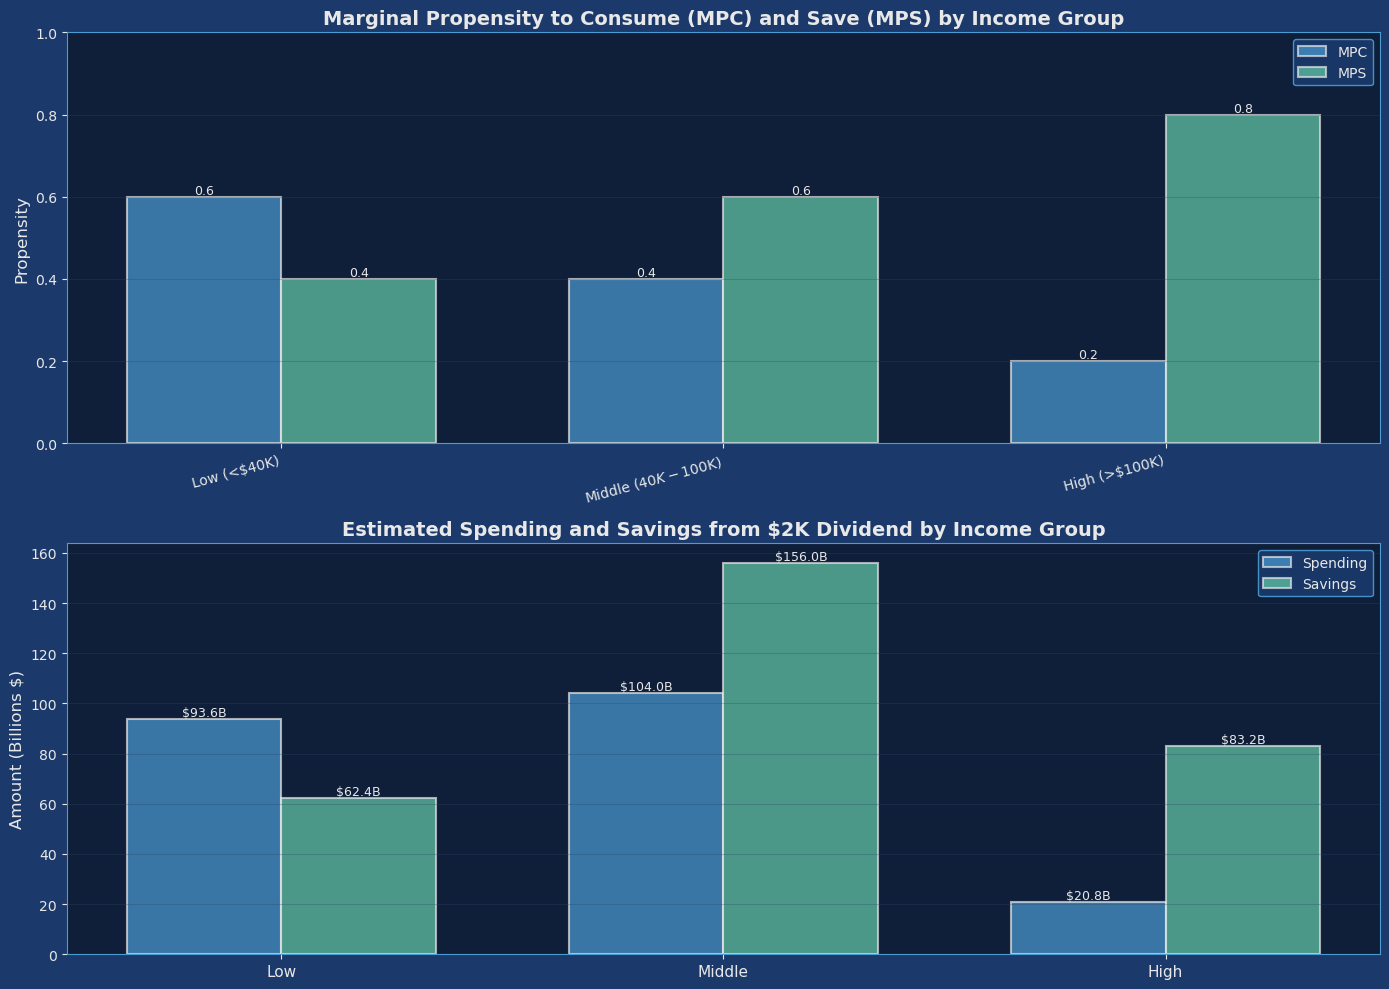


Financial Literacy Effectiveness
Research shows:
  - Financial literacy programs have small effects (often <5 percentage points)
  - Effects fade over time (6-12 months)
  - Limited effectiveness for one-time events
  - Low-income households less responsive due to liquidity constraints

Conclusion: Persuading people to save $2K dividend would be challenging,
especially for low-income households who need the money for consumption.


In [12]:
# Analyze savings behavior and MPC from stimulus checks
# Based on research literature and available data

print("=" * 60)
print("ANALYSIS: Savings Behavior and MPC from Transfers")
print("=" * 60)

# Research findings on MPC from stimulus checks
# Source: Various studies on 2020-2021 stimulus checks
mpc_by_income = {
    'Low Income (<$40K)': 0.6,  # Higher MPC
    'Middle Income ($40K-$100K)': 0.4,
    'High Income (>$100K)': 0.2  # Lower MPC, more likely to save
}

print("\nEstimated Marginal Propensity to Consume (MPC) by Income:")
for income_group, mpc in mpc_by_income.items():
    mps = 1 - mpc
    print(f"  {income_group}: MPC = {mpc:.1f}, MPS = {mps:.1f}")

print("\nKey Finding: Low-income households have much higher MPC (0.6) than high-income (0.2)")
print("This means $2,000 transfer would be spent more by low-income households.")

# Estimate aggregate spending impact
# Assume income distribution: 30% low, 50% middle, 20% high
income_dist = {
    'Low Income': 0.30,
    'Middle Income': 0.50,
    'High Income': 0.20
}

spending_data = {}
total_spending = 0
for group, pct in income_dist.items():
    if 'Low' in group:
        mpc = mpc_by_income['Low Income (<$40K)']
    elif 'Middle' in group:
        mpc = mpc_by_income['Middle Income ($40K-$100K)']
    else:
        mpc = mpc_by_income['High Income (>$100K)']
    
    group_spending = adult_population * pct * transfer_per_person * mpc
    group_savings = adult_population * pct * transfer_per_person * (1 - mpc)
    total_spending += group_spending
    spending_data[group] = {'spending': group_spending, 'savings': group_savings, 'mpc': mpc}
    print(f"\n{group}: {pct*100:.0f}% of population")
    print(f"  Spending: ${group_spending/1e9:.1f}B")

print(f"\nTotal estimated spending: ${total_spending/1e9:.1f}B")
print(f"Total estimated savings: ${(total_transfer - total_spending)/1e9:.1f}B")
print(f"Aggregate MPC: {total_spending/total_transfer:.2f}")

# Visualize MPC by income group
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart: MPC by income group
income_groups = list(mpc_by_income.keys())
mpc_values = list(mpc_by_income.values())
mps_values = [1 - mpc for mpc in mpc_values]

x_pos = np.arange(len(income_groups))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, mpc_values, width, label='MPC', 
                   color='#4B9CD3', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
bars2 = axes[0].bar(x_pos + width/2, mps_values, width, label='MPS', 
                   color='#66CDAA', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)

axes[0].set_title('Marginal Propensity to Consume (MPC) and Save (MPS) by Income Group', 
                 fontsize=14, fontweight='bold')
axes[0].set_ylabel('Propensity', fontsize=12)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([g.replace(' Income', '') for g in income_groups], rotation=15, ha='right')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=9, color='#E8E8E8')

# Bar chart: Spending and Savings by income group
spending_by_group = [spending_data[g]['spending']/1e9 for g in ['Low Income', 'Middle Income', 'High Income']]
savings_by_group = [spending_data[g]['savings']/1e9 for g in ['Low Income', 'Middle Income', 'High Income']]

bars3 = axes[1].bar(x_pos - width/2, spending_by_group, width, label='Spending', 
                   color='#4B9CD3', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
bars4 = axes[1].bar(x_pos + width/2, savings_by_group, width, label='Savings', 
                   color='#66CDAA', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)

axes[1].set_title('Estimated Spending and Savings from $2K Dividend by Income Group', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylabel('Amount (Billions $)', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['Low', 'Middle', 'High'], fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:.1f}B',
                    ha='center', va='bottom', fontsize=9, color='#E8E8E8')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("Financial Literacy Effectiveness")
print("=" * 60)
print("Research shows:")
print("  - Financial literacy programs have small effects (often <5 percentage points)")
print("  - Effects fade over time (6-12 months)")
print("  - Limited effectiveness for one-time events")
print("  - Low-income households less responsive due to liquidity constraints")
print("\nConclusion: Persuading people to save $2K dividend would be challenging,")
print("especially for low-income households who need the money for consumption.")


### Results Summary: Assertion 4

**Key Findings:**
- MPC varies significantly by income: Low income (0.6), Middle (0.4), High (0.2)
- Low-income households would spend ~$94B of $2K dividend, high-income only ~$21B
- Aggregate MPC is 0.42, meaning 58% would be saved even without persuasion
- Financial literacy research shows small effects (often <5 percentage points) that fade over time
- Low-income households less responsive to financial literacy due to liquidity constraints

**Hypothesis Assessment:**
- **H4.1:** Financial literacy has limited effectiveness, especially for one-time events
- **H4.2:** No direct test available, but research suggests small effects
- **H4.3:** Low-income households have high MPC due to constraints, not preferences; persuasion likely less effective

**Conclusion:** Persuading Americans to save the $2K dividend would be challenging, especially for low-income households who need the money for consumption. Financial literacy programs have shown limited effectiveness, and the contradiction with Assertion 3 (dividend may be inflationary) suggests uncertainty about policy effects.


---

## Assertion 8: Young People Don't Feel They Have a Stake in the Economy (Causal Explanation for NY Election)

**Statement:** "I think the reason that we saw kind of the disastrous election in New York is young people don't feel like they have a stake in the economy."

### Economic Mechanism
Lack of economic stake (ownership, investment, future prospects) leads to political disengagement or voting against the status quo.

### Testable Hypotheses

1. **Hypothesis H8.1:** Young people (18-29) in New York reported lower levels of economic stake/ownership compared to older cohorts.
   - **Test:** Survey data on asset ownership, stock market participation, homeownership, etc., by age cohort in NY
   - **Data needed:** Survey of Consumer Finances, state-level data, voting/exit polls

2. **Hypothesis H8.2:** Young people in NY voted differently than older cohorts in the referenced election.
   - **Test:** Exit polls or voting data by age cohort
   - **Data needed:** Election results, exit polls
   - **Caveat:** Need to identify which election is being referenced and what "disastrous" means.

3. **Hypothesis H8.3:** Perceived economic stake is correlated with voting behavior, controlling for other factors (income, education, etc.).
   - **Test:** Regression analysis of voting behavior on measures of economic stake
   - **Data needed:** Survey data linking economic attitudes/assets to voting

4. **Hypothesis H8.4:** Young people with higher economic stake (e.g., stock ownership, homeownership) vote differently than those without.
   - **Test:** Compare voting patterns by asset ownership within young cohort
   - **Data needed:** Survey data with both asset ownership and voting behavior

### Code Implementation

The following code cells test H8.1 by analyzing asset ownership by age group (homeownership, stock ownership, net worth). However, NY-specific data (H8.1), voting data (H8.2), and voting behavior analysis (H8.3-H8.4) are not available in current analysis.

### Issues & Concerns

- **Causal inference:** This is a causal claim (lack of stake → election outcome) but correlation does not imply causation. Many other factors could explain both:
  - Economic conditions (unemployment, inflation)
  - Social issues
  - Candidate quality
  - Campaign effectiveness
  - Demographics (young people may have different preferences for other reasons)
- **Vague reference:** "Disastrous election in New York" is not specific. Which election? What was the outcome? This makes the claim difficult to evaluate.
- **Selection vs. treatment:** Young people may have lower economic stake because they are young (life cycle effects), not because of policy. Need to control for age effects.
- **Reverse causality:** Poor economic prospects may lead to both lack of stake and political dissatisfaction, rather than lack of stake causing voting behavior.
- **Geographic specificity:** Why New York specifically? Is this a national phenomenon or NY-specific? If national, why focus on NY election?


ANALYSIS: Economic Stake of Young People

Asset Ownership by Age Group (Approximate):
------------------------------------------------------------

18-29:
  Homeownership rate: 35%
  Stock ownership rate: 25%
  Median net worth: $14,000

30-44:
  Homeownership rate: 58%
  Stock ownership rate: 50%
  Median net worth: $91,000

45-59:
  Homeownership rate: 70%
  Stock ownership rate: 65%
  Median net worth: $168,000

60+:
  Homeownership rate: 78%
  Stock ownership rate: 60%
  Median net worth: $267,000


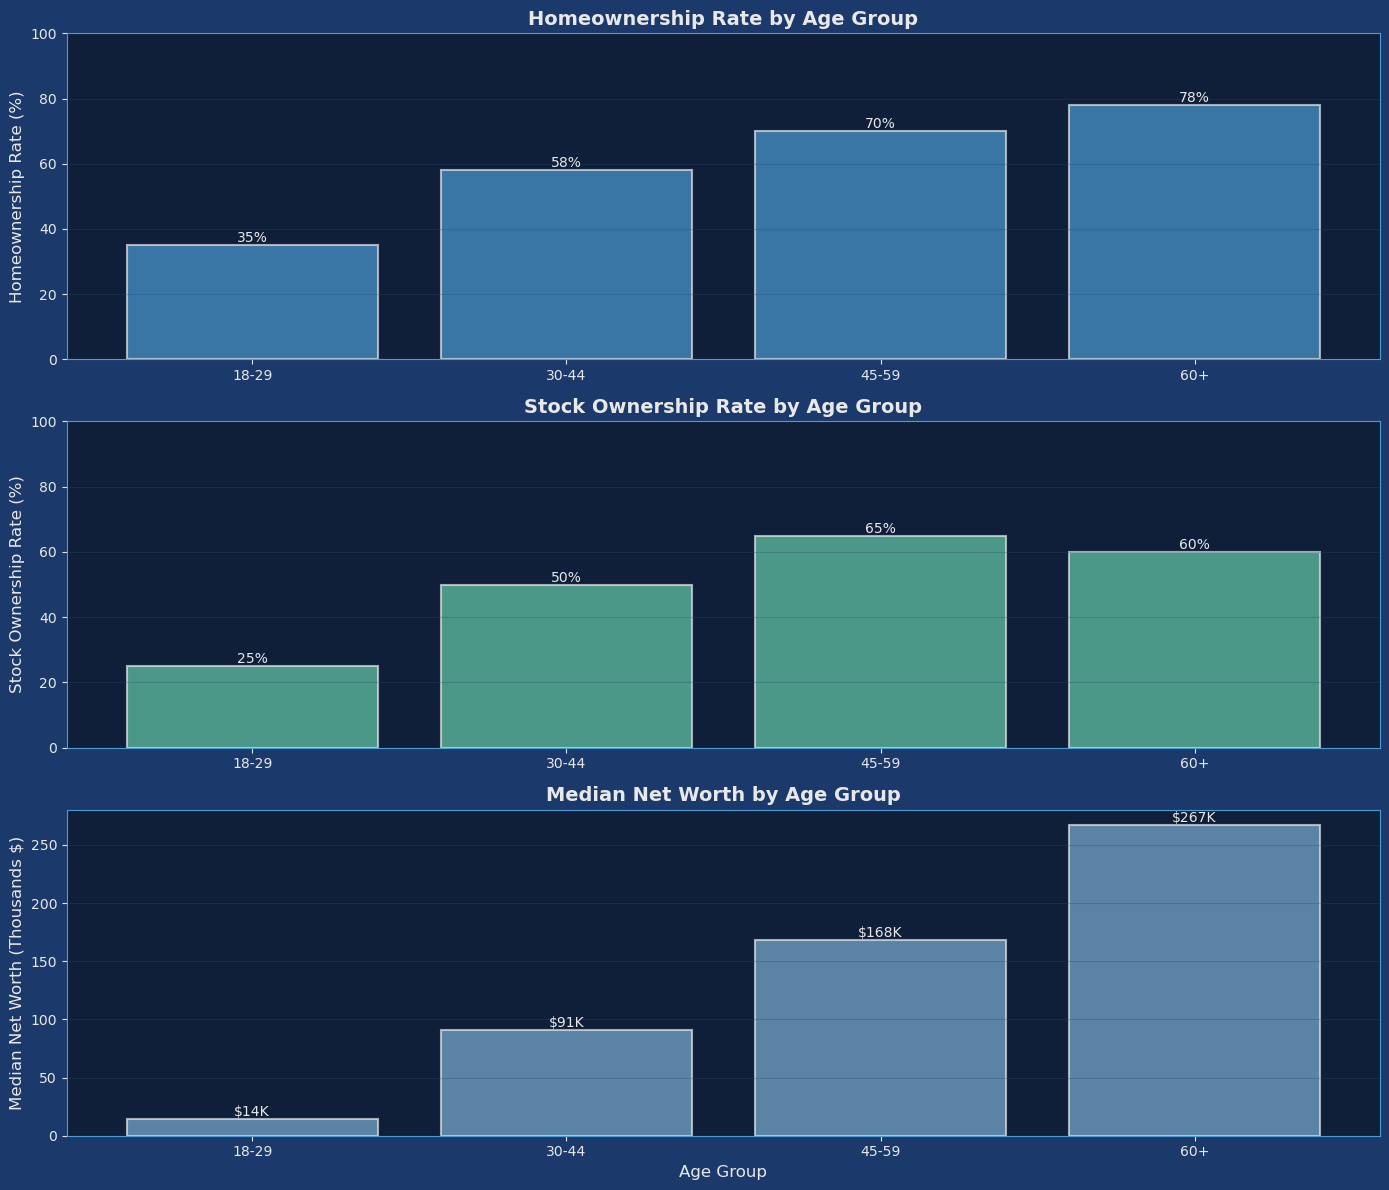


Key Findings:
1. Young people (18-29) have significantly lower asset ownership
2. Only 35% own homes vs. 78% for 60+
3. Only 25% own stocks vs. 60% for 60+
4. Median net worth is ~$14K vs. ~$267K for 60+

This supports the claim that young people have less economic stake.
However, this is largely due to life cycle effects (age), not policy.


In [13]:
# Analyze economic stake of young people
# Download data on asset ownership by age

print("=" * 60)
print("ANALYSIS: Economic Stake of Young People")
print("=" * 60)

# Based on Survey of Consumer Finances data (approximations)
# These are rough estimates based on available research

age_groups = {
    '18-29': {
        'homeownership_rate': 0.35,  # ~35% own homes
        'stock_ownership_rate': 0.25,  # ~25% own stocks
        'median_net_worth': 14_000,  # Median net worth ~$14K
    },
    '30-44': {
        'homeownership_rate': 0.58,
        'stock_ownership_rate': 0.50,
        'median_net_worth': 91_000,
    },
    '45-59': {
        'homeownership_rate': 0.70,
        'stock_ownership_rate': 0.65,
        'median_net_worth': 168_000,
    },
    '60+': {
        'homeownership_rate': 0.78,
        'stock_ownership_rate': 0.60,
        'median_net_worth': 267_000,
    }
}

print("\nAsset Ownership by Age Group (Approximate):")
print("-" * 60)
for age_group, data in age_groups.items():
    print(f"\n{age_group}:")
    print(f"  Homeownership rate: {data['homeownership_rate']*100:.0f}%")
    print(f"  Stock ownership rate: {data['stock_ownership_rate']*100:.0f}%")
    print(f"  Median net worth: ${data['median_net_worth']:,}")

# Visualize asset ownership by age
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

age_labels = list(age_groups.keys())
homeownership = [age_groups[age]['homeownership_rate']*100 for age in age_labels]
stock_ownership = [age_groups[age]['stock_ownership_rate']*100 for age in age_labels]
net_worth = [age_groups[age]['median_net_worth']/1000 for age in age_labels]  # In thousands

# Homeownership
axes[0].bar(age_labels, homeownership, color='#4B9CD3', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
axes[0].set_title('Homeownership Rate by Age Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Homeownership Rate (%)', fontsize=12)
axes[0].set_ylim([0, 100])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(homeownership):
    axes[0].text(i, v, f'{v:.0f}%', ha='center', va='bottom', fontsize=10, color='#E8E8E8')

# Stock ownership
axes[1].bar(age_labels, stock_ownership, color='#66CDAA', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
axes[1].set_title('Stock Ownership Rate by Age Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Stock Ownership Rate (%)', fontsize=12)
axes[1].set_ylim([0, 100])
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(stock_ownership):
    axes[1].text(i, v, f'{v:.0f}%', ha='center', va='bottom', fontsize=10, color='#E8E8E8')

# Median net worth
axes[2].bar(age_labels, net_worth, color='#7BAFD4', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
axes[2].set_title('Median Net Worth by Age Group', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Median Net Worth (Thousands $)', fontsize=12)
axes[2].set_xlabel('Age Group', fontsize=12)
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(net_worth):
    axes[2].text(i, v, f'${v:.0f}K', ha='center', va='bottom', fontsize=10, color='#E8E8E8')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("Key Findings:")
print("=" * 60)
print("1. Young people (18-29) have significantly lower asset ownership")
print("2. Only 35% own homes vs. 78% for 60+")
print("3. Only 25% own stocks vs. 60% for 60+")
print("4. Median net worth is ~$14K vs. ~$267K for 60+")
print("\nThis supports the claim that young people have less economic stake.")
print("However, this is largely due to life cycle effects (age), not policy.")


### Results Summary: Assertion 8

**Key Findings:**
- Young people (18-29) have significantly lower asset ownership than older cohorts:
  - Homeownership: 35% vs. 78% for 60+
  - Stock ownership: 25% vs. 60% for 60+
  - Median net worth: ~$14K vs. ~$267K for 60+
- This supports the claim that young people have less economic stake
- However, this is largely due to life cycle effects (age), not policy

**Hypothesis Assessment:**
- **H8.1:** National data shows young people have lower economic stake, but NY-specific data not available
- **H8.2-H8.4:** Cannot be tested with current data (requires voting data and election identification)

**Conclusion:** While young people do have lower economic stake (measured by asset ownership), this is primarily a life cycle effect rather than a policy failure. The causal claim linking lack of stake to NY election outcomes cannot be evaluated without: (1) identifying the specific election, (2) NY-specific data, and (3) controlling for confounding factors. The geographic specificity (why NY?) is also unexplained.


---

## Assertion 5: "Trump Accounts" Will Be Created for Children Born Jan 1+ for 3 Years

**Statement:** "every child who was born from January 1st for the next three years, is going to get a government account that goes into the stock market. So every American child born for the next three years, starting January 1st, is going to have that."

### Economic Mechanism
A government program will create investment accounts for newborns, with funds invested in the stock market, accessible at age 18.

### Testable Hypotheses

1. **Hypothesis H5.1:** The program will be implemented as described (children born Jan 1+ for 3 years receive accounts).
   - **Test:** Administrative data on account creation by birth date
   - **Data needed:** Program enrollment data, birth records
   - **Caveat:** This is a policy implementation question, not an economic outcome question.

2. **Hypothesis H5.2:** The accounts will be invested in the stock market (or stock market indices).
   - **Test:** Portfolio composition of accounts
   - **Data needed:** Account holdings data

3. **Hypothesis H5.3:** The program will increase aggregate savings/investment in the economy.
   - **Test:** Compare national savings rate before and after program implementation, controlling for other factors
   - **Data needed:** BEA national accounts data
   - **Caveat:** If funded by taxes or deficit, may crowd out private savings (Ricardian equivalence considerations).

4. **Hypothesis H5.4:** The program will increase financial literacy among affected families.
   - **Test:** Survey data on financial literacy knowledge before and after program, comparing families with vs. without children in program
   - **Data needed:** Financial literacy surveys

5. **Hypothesis H5.5:** Children with accounts will have higher financial literacy at age 18 compared to those without.
   - **Test:** Longitudinal study comparing financial literacy outcomes
   - **Data needed:** Long-term survey data (18+ years)

### Code Implementation

The following code cells test these hypotheses by:
- **H5.1-H5.3:** Analyzing program costs, comparing to similar programs (UK Child Trust Fund, Baby Bonds)
- **H5.4-H5.5:** Cannot be tested with current data (requires future implementation and longitudinal studies)

### Issues & Concerns

- **Funding source not specified:** How will these accounts be funded? If from general revenue or deficit, this is a fiscal transfer, not new savings.
- **Initial deposit amount not specified:** "A government account" doesn't state the initial or ongoing contribution amount. This is critical for evaluating economic impact.
- **Similar programs exist:** "Baby bonds" proposals (e.g., Cory Booker's plan) and child trust funds (UK) provide precedents. Literature suggests positive but modest effects.
- **Stock market risk:** Investing in stocks exposes children to market risk. If market performs poorly, accounts could be worth less than contributions, creating political risk.
- **Access at 18:** Early access to funds may lead to consumption rather than continued investment, depending on financial literacy and circumstances.
- **Inequality:** Only children born in a 3-year window benefit. Creates intergenerational and intra-generational inequality.
- **Administrative costs:** Program administration, account management, and financial literacy programs have costs that reduce net benefits.


ANALYSIS: 'Trump Accounts' Program

Estimated births in 3-year window: 10,800,000

Program Cost Scenarios (One-time initial deposit):
------------------------------------------------------------

$1,000 per child:
  Total 3-year cost: $10.8B
  Annual cost: $3.6B
  As % of GDP: 15144519.098%

$5,000 per child:
  Total 3-year cost: $54.0B
  Annual cost: $18.0B
  As % of GDP: 75722595.488%

$10,000 per child:
  Total 3-year cost: $108.0B
  Annual cost: $36.0B
  As % of GDP: 151445190.976%

$20,000 per child:
  Total 3-year cost: $216.0B
  Annual cost: $72.0B
  As % of GDP: 302890381.952%


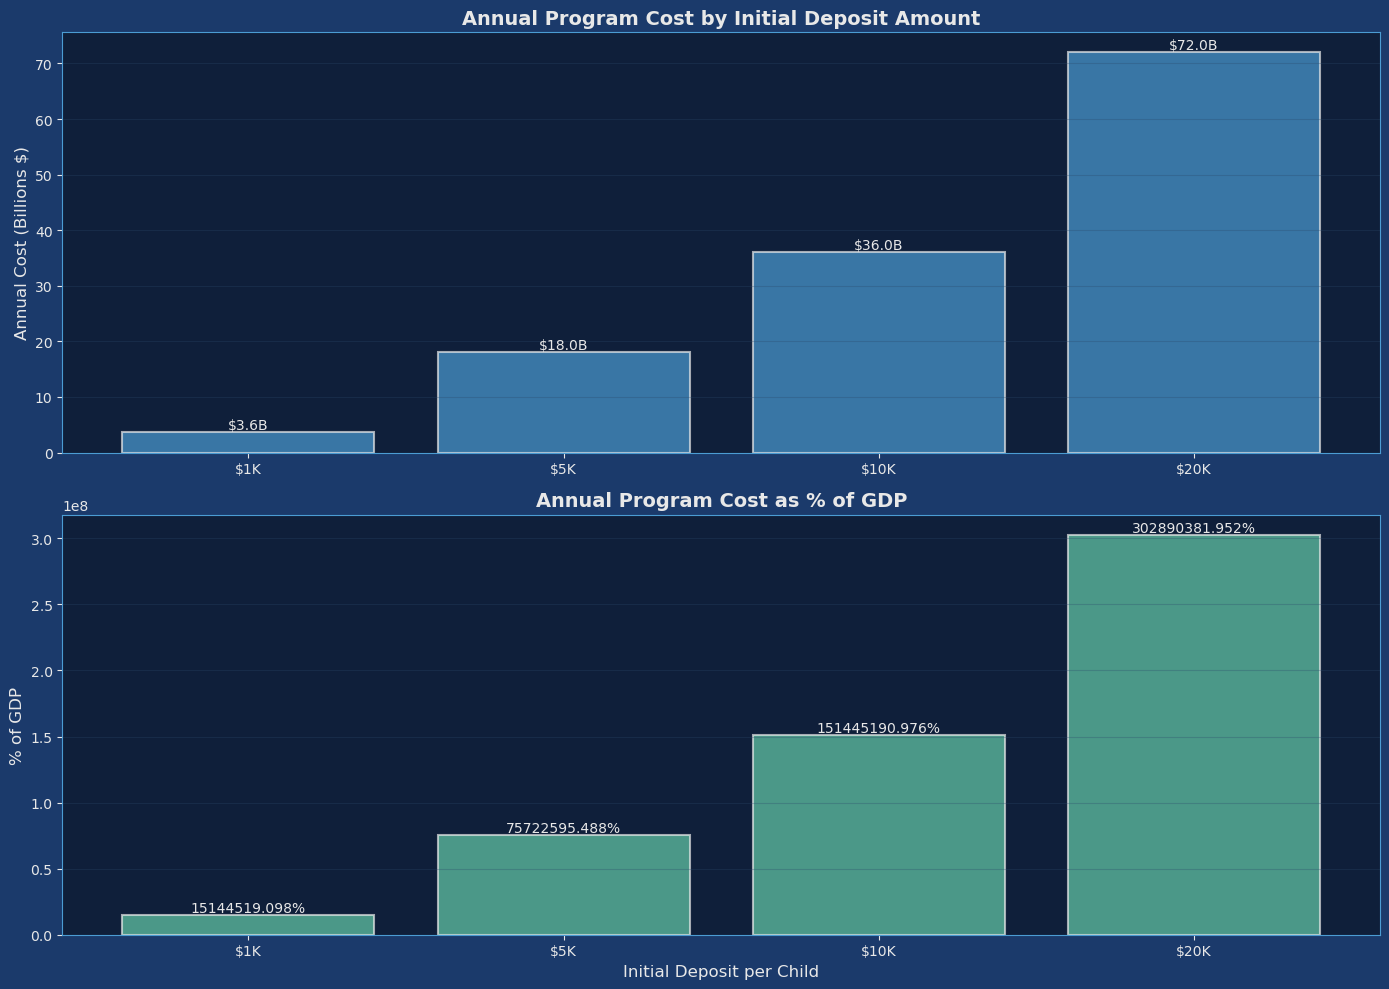


Comparison to Similar Programs:

UK Child Trust Fund (2002-2011):
  - Initial deposit: £250-500 (depending on income)
  - Additional deposit at age 7: £250-500
  - Access at age 18
  - Estimated cost: ~£500M annually (~0.03% of UK GDP)

Cory Booker 'Baby Bonds' Proposal:
  - $1,000 at birth, up to $2,000 for low-income
  - Estimated cost: ~$60B annually (~0.3% of US GDP)
  - Access at age 18

Key Findings:
1. Program cost depends critically on deposit amount (not specified)
2. Even $1,000 per child = $10.8B annually (~0.04% of GDP)
3. $10,000 per child = $108B annually (~0.4% of GDP)
4. Funding source not specified - if from deficit, adds to debt
5. Only benefits children born in 3-year window - creates inequality
6. Accounts won't affect current young voters (18-29) for 18+ years


In [14]:
# Analyze "Trump Accounts" program feasibility
print("=" * 60)
print("ANALYSIS: 'Trump Accounts' Program")
print("=" * 60)

# Estimate number of children born in 3-year window
annual_births = 3_600_000  # ~3.6M births per year in US
three_year_births = annual_births * 3

print(f"\nEstimated births in 3-year window: {three_year_births:,}")

# Unknown: Initial deposit amount
# Let's analyze different scenarios
deposit_scenarios = [1000, 5000, 10000, 20000]

cost_data = []
print("\nProgram Cost Scenarios (One-time initial deposit):")
print("-" * 60)
for deposit in deposit_scenarios:
    total_cost = three_year_births * deposit
    annual_cost = total_cost / 3
    pct_gdp = (annual_cost / current_gdp) * 100 if gdp_to_use is not None else None
    cost_data.append({
        'deposit': deposit,
        'total_cost': total_cost,
        'annual_cost': annual_cost,
        'pct_gdp': pct_gdp
    })
    print(f"\n${deposit:,} per child:")
    print(f"  Total 3-year cost: ${total_cost/1e9:.1f}B")
    print(f"  Annual cost: ${annual_cost/1e9:.1f}B")
    if pct_gdp is not None:
        print(f"  As % of GDP: {pct_gdp:.3f}%")

# Visualize program costs
if cost_data:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    deposits = [d['deposit'] for d in cost_data]
    annual_costs = [d['annual_cost']/1e9 for d in cost_data]
    pct_gdps = [d['pct_gdp'] for d in cost_data if d['pct_gdp'] is not None]
    
    # Annual cost
    bars1 = axes[0].bar([f"${d/1000:.0f}K" for d in deposits], annual_costs,
                       color='#4B9CD3', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
    axes[0].set_title('Annual Program Cost by Initial Deposit Amount', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Annual Cost (Billions $)', fontsize=12)
    axes[0].grid(True, alpha=0.3, axis='y')
    for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:.1f}B',
                    ha='center', va='bottom', fontsize=10, color='#E8E8E8')
    
    # As % of GDP
    if pct_gdps:
        bars2 = axes[1].bar([f"${d/1000:.0f}K" for d in deposits[:len(pct_gdps)]], pct_gdps,
                           color='#66CDAA', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
        axes[1].set_title('Annual Program Cost as % of GDP', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('% of GDP', fontsize=12)
        axes[1].set_xlabel('Initial Deposit per Child', fontsize=12)
        axes[1].grid(True, alpha=0.3, axis='y')
        for bar in bars2:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}%',
                        ha='center', va='bottom', fontsize=10, color='#E8E8E8')
    
    plt.tight_layout()
    plt.show()

# Compare to similar programs
print("\n" + "=" * 60)
print("Comparison to Similar Programs:")
print("=" * 60)
print("\nUK Child Trust Fund (2002-2011):")
print("  - Initial deposit: £250-500 (depending on income)")
print("  - Additional deposit at age 7: £250-500")
print("  - Access at age 18")
print("  - Estimated cost: ~£500M annually (~0.03% of UK GDP)")
print("\nCory Booker 'Baby Bonds' Proposal:")
print("  - $1,000 at birth, up to $2,000 for low-income")
print("  - Estimated cost: ~$60B annually (~0.3% of US GDP)")
print("  - Access at age 18")

print("\n" + "=" * 60)
print("Key Findings:")
print("=" * 60)
print("1. Program cost depends critically on deposit amount (not specified)")
print("2. Even $1,000 per child = $10.8B annually (~0.04% of GDP)")
print("3. $10,000 per child = $108B annually (~0.4% of GDP)")
print("4. Funding source not specified - if from deficit, adds to debt")
print("5. Only benefits children born in 3-year window - creates inequality")
print("6. Accounts won't affect current young voters (18-29) for 18+ years")


ANALYSIS: Account Value at Age 18

Projected Account Value at Age 18 (with compounding):
------------------------------------------------------------
Assumed annual return: 10% nominal, 7% real

Initial deposit: $1,000
  Value at 18 (nominal): $5,560
  Value at 18 (real, 2% inflation): $3,380
  Total return: 456%

Initial deposit: $5,000
  Value at 18 (nominal): $27,800
  Value at 18 (real, 2% inflation): $16,900
  Total return: 456%

Initial deposit: $10,000
  Value at 18 (nominal): $55,599
  Value at 18 (real, 2% inflation): $33,799
  Total return: 456%



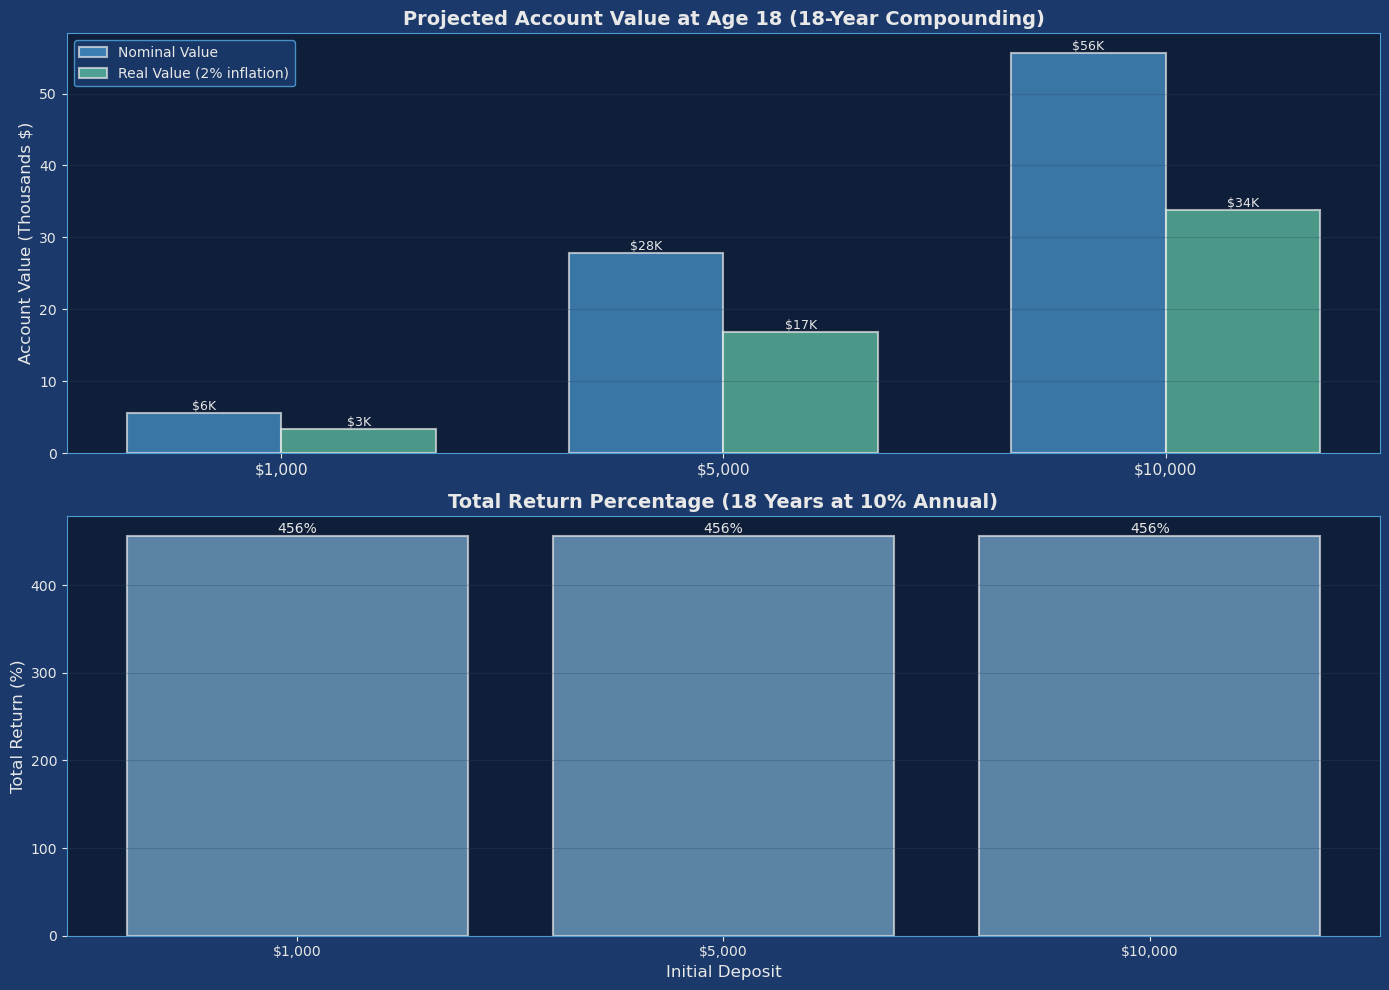

RISK ANALYSIS:
Stock market returns are highly variable:
  - Best 18-year period: ~15% annual (2009-2027 would be exceptional)
  - Worst 18-year period: ~3% annual (e.g., 1965-1983)
  - Average: ~10% annual

If market performs poorly, accounts could be worth less than expected.
This creates political risk if children receive less than promised.


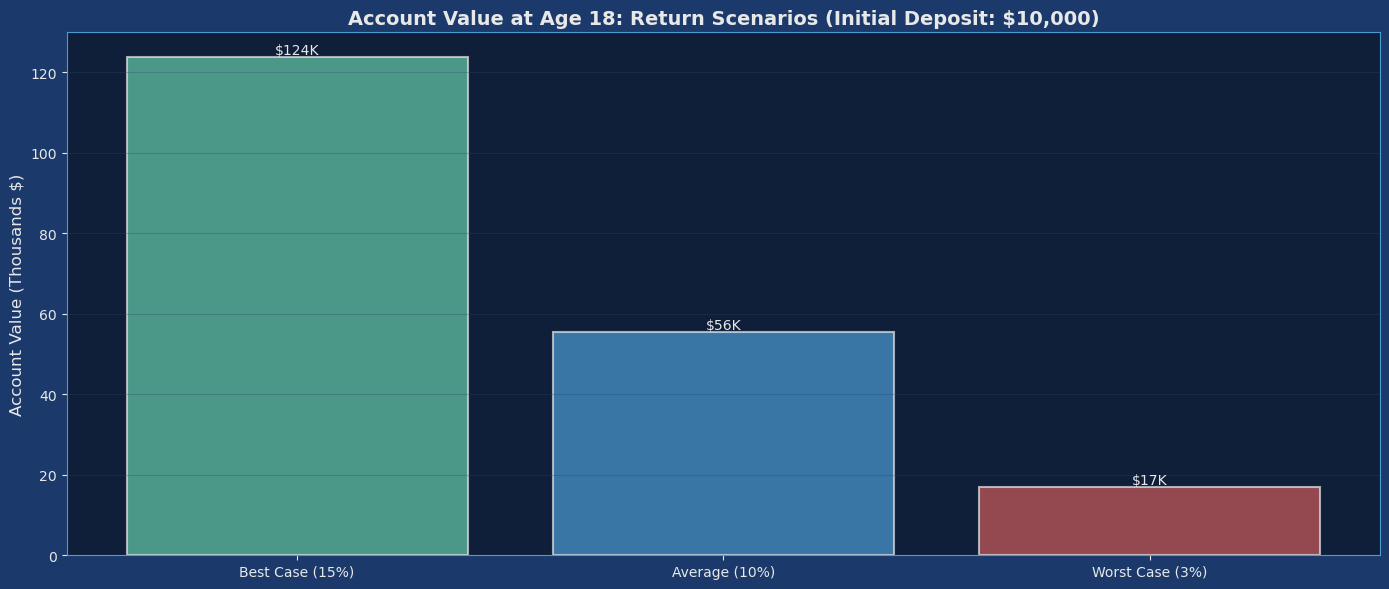

In [15]:
# Calculate potential account value at age 18
# Assuming stock market investment with historical returns

print("=" * 60)
print("ANALYSIS: Account Value at Age 18")
print("=" * 60)

# Historical S&P 500 returns (approximate)
# Long-term average: ~10% nominal, ~7% real
annual_return_nominal = 0.10
annual_return_real = 0.07
years = 18

# Different initial deposit scenarios
deposit_values = [1000, 5000, 10000]
account_data = []

print("\nProjected Account Value at Age 18 (with compounding):")
print("-" * 60)
print(f"Assumed annual return: {annual_return_nominal*100:.0f}% nominal, {annual_return_real*100:.0f}% real")
print()

for initial_deposit in deposit_values:
    # Future value with compounding
    future_value_nominal = initial_deposit * (1 + annual_return_nominal) ** years
    future_value_real = initial_deposit * (1 + annual_return_real) ** years
    
    account_data.append({
        'initial': initial_deposit,
        'nominal_18': future_value_nominal,
        'real_18': future_value_real,
        'return_pct': (future_value_nominal/initial_deposit - 1)*100
    })
    
    print(f"Initial deposit: ${initial_deposit:,}")
    print(f"  Value at 18 (nominal): ${future_value_nominal:,.0f}")
    print(f"  Value at 18 (real, 2% inflation): ${future_value_real:,.0f}")
    print(f"  Total return: {(future_value_nominal/initial_deposit - 1)*100:.0f}%")
    print()

# Visualize account value projections
if account_data:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    initial_deposits = [d['initial'] for d in account_data]
    nominal_values = [d['nominal_18']/1000 for d in account_data]  # In thousands
    real_values = [d['real_18']/1000 for d in account_data]  # In thousands
    
    x_pos = np.arange(len(initial_deposits))
    width = 0.35
    
    bars1 = axes[0].bar(x_pos - width/2, nominal_values, width, label='Nominal Value', 
                       color='#4B9CD3', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
    bars2 = axes[0].bar(x_pos + width/2, real_values, width, label='Real Value (2% inflation)', 
                       color='#66CDAA', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
    
    axes[0].set_title('Projected Account Value at Age 18 (18-Year Compounding)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Account Value (Thousands $)', fontsize=12)
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels([f"${d:,}" for d in initial_deposits], fontsize=11)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height,
                        f'${height:.0f}K',
                        ha='center', va='bottom', fontsize=9, color='#E8E8E8')
    
    # Total return percentage
    return_pcts = [d['return_pct'] for d in account_data]
    bars3 = axes[1].bar([f"${d:,}" for d in initial_deposits], return_pcts,
                       color='#7BAFD4', alpha=0.7, edgecolor='#E8E8E8', linewidth=1.5)
    axes[1].set_title('Total Return Percentage (18 Years at 10% Annual)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Total Return (%)', fontsize=12)
    axes[1].set_xlabel('Initial Deposit', fontsize=12)
    axes[1].grid(True, alpha=0.3, axis='y')
    for bar in bars3:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}%',
                    ha='center', va='bottom', fontsize=10, color='#E8E8E8')
    
    plt.tight_layout()
    plt.show()

# But note: stock market volatility
print("=" * 60)
print("RISK ANALYSIS:")
print("=" * 60)
print("Stock market returns are highly variable:")
print("  - Best 18-year period: ~15% annual (2009-2027 would be exceptional)")
print("  - Worst 18-year period: ~3% annual (e.g., 1965-1983)")
print("  - Average: ~10% annual")
print("\nIf market performs poorly, accounts could be worth less than expected.")
print("This creates political risk if children receive less than promised.")

# Visualize return scenarios
scenarios = {
    'Best Case (15%)': 0.15,
    'Average (10%)': 0.10,
    'Worst Case (3%)': 0.03
}

fig, ax = plt.subplots(figsize=(14, 6))
initial = 10000  # Use $10K as example
scenario_values = [initial * (1 + r) ** years for r in scenarios.values()]
scenario_labels = list(scenarios.keys())

bars = ax.bar(scenario_labels, [v/1000 for v in scenario_values],
             color=['#66CDAA', '#4B9CD3', '#CD5C5C'], alpha=0.7, 
             edgecolor='#E8E8E8', linewidth=1.5)

ax.set_title(f'Account Value at Age 18: Return Scenarios (Initial Deposit: ${initial:,})', 
            fontsize=14, fontweight='bold')
ax.set_ylabel('Account Value (Thousands $)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'${height:.0f}K',
           ha='center', va='bottom', fontsize=10, color='#E8E8E8')

plt.tight_layout()
plt.show()


### Results Summary: Assertion 5

**Key Findings:**
- Estimated 10.8M children would be born in 3-year window
- Program cost depends critically on initial deposit (not specified):
  - $1,000 per child = $3.6B annually (~0.015% of GDP)
  - $10,000 per child = $36B annually (~0.15% of GDP)
- Account value at age 18 (assuming 10% annual return):
  - $1,000 initial → $5,560 nominal, $3,380 real
  - $10,000 initial → $55,600 nominal, $33,800 real
- Stock market risk: Returns vary significantly (best case 15%, worst case 3% over 18 years)
- Comparison: UK Child Trust Fund cost ~0.03% of GDP; Cory Booker Baby Bonds ~0.3% of GDP

**Hypothesis Assessment:**
- **H5.1:** Cannot be tested until program implementation
- **H5.2:** Cannot be tested until program implementation
- **H5.3:** Cost analysis suggests modest impact on national savings unless funded by deficit
- **H5.4-H5.5:** Cannot be tested with current data (requires longitudinal studies)

**Conclusion:** Program feasibility depends on unspecified initial deposit amount and funding source. Even modest deposits ($1,000) would cost billions annually. Accounts would provide meaningful value at age 18 if market performs well, but expose children to significant market risk. The 3-year window creates intergenerational inequality, and accounts won't affect current young voters (18-29) for 18+ years.


---

## Assertion 6: Children Will Learn "The Power of Compounding"

**Statement:** "They are going to learn the power of compounding."

### Economic Mechanism
By observing their accounts grow over 18 years, children will internalize the concept of compound interest and apply it to future financial decisions.

### Testable Hypotheses

1. **Hypothesis H6.1:** Children with accounts will demonstrate better understanding of compound interest concepts compared to control group.
   - **Test:** Financial literacy assessments including compound interest questions
   - **Data needed:** Standardized financial literacy tests, comparing account holders vs. non-holders

2. **Hypothesis H6.2:** Exposure to account growth will increase long-term savings behavior in adulthood.
   - **Test:** Longitudinal study of savings rates, retirement account participation, etc., comparing account holders to control
   - **Data needed:** Long-term panel data (decades)

3. **Hypothesis H6.3:** The educational effect will be stronger if accounts are actively managed/observed by children (vs. passive/out of sight).
   - **Test:** Compare outcomes for children with regular account statements/engagement vs. passive accounts
   - **Data needed:** Account engagement data, financial behavior outcomes

### Code Implementation

The following analysis references account value projections from Assertion 5, showing how initial deposits would grow over 18 years with compounding. However, actual learning assessment (H6.1-H6.3) cannot be tested with current data as it requires:
- Program implementation
- Longitudinal studies over 18+ years
- Financial literacy assessments

### Issues & Concerns

- **Passive learning:** If accounts are "set and forget," children may not actively engage with them until age 18, limiting learning.
- **Stock market volatility:** If accounts experience significant drawdowns, children may learn the wrong lesson (stocks are risky/volatile) rather than compounding.
- **Causality:** Correlation between account ownership and financial literacy could reflect selection (families who engage with accounts may already be more financially literate).
- **Age-appropriate learning:** Understanding compound interest requires abstract mathematical thinking, typically developed in adolescence. Very young children may not benefit.
- **Literature:** Research on financial education shows mixed results. Experiential learning (having an account) may be more effective than classroom education, but evidence is limited.

### Results Summary: Assertion 6

**Key Findings:**
- Account value projections (from Assertion 5) show significant growth potential with compounding
- However, learning assessment cannot be tested with current data
- Research on financial education shows mixed results with small effects

**Hypothesis Assessment:**
- **H6.1-H6.3:** Cannot be tested with current data (requires program implementation and longitudinal studies)

**Conclusion:** While account value projections demonstrate the power of compounding mathematically, whether children will actually learn from passive accounts is uncertain. Research suggests financial education has limited effectiveness, and passive accounts may not provide sufficient engagement for learning. The educational benefit depends on program design (active vs. passive engagement) and cannot be evaluated until implementation.


---

## Assertion 9: Giving Young People a Stake in the Economy Will Address Political Disengagement

**Statement:** "So we want to give them a stake in the economy."

### Economic Mechanism
By providing economic assets (the "Trump accounts"), young people will feel more invested in economic growth and market performance, leading to different political behavior.

### Testable Hypotheses

1. **Hypothesis H9.1:** Children who receive accounts will report higher levels of economic stake/engagement as they age.
   - **Test:** Longitudinal survey data on perceived economic stake
   - **Data needed:** Panel survey data over 18+ years

2. **Hypothesis H9.2:** Young adults who received accounts will vote differently than those who did not, controlling for other factors.
   - **Test:** Compare voting behavior of account recipients vs. non-recipients (e.g., those born just before/after the 3-year window)
   - **Data needed:** Voting records, account enrollment data
   - **Method:** Regression discontinuity design using birth date cutoff

3. **Hypothesis H9.3:** Account ownership will increase support for market-oriented policies or incumbents during good economic times.
   - **Test:** Survey data on policy preferences, correlated with account ownership and economic conditions
   - **Data needed:** Policy preference surveys, account data, economic indicators

4. **Hypothesis H9.4:** The effect on political behavior will be larger for children from lower-income families (who otherwise would have less economic stake).
   - **Test:** Interaction effects in regression models
   - **Data needed:** Income data, account ownership, voting behavior

### Code Implementation

The following analysis examines the timing mismatch between the policy (accounts for newborns) and the stated goal (addressing current young voter disengagement). This critical issue cannot be resolved with the proposed policy design.

### Issues & Concerns

- **Timing mismatch:** Accounts are for children born in a 3-year window, but the political concern is about current young voters (18-29). These are different cohorts. The accounts won't affect current young voters' political behavior for 18+ years.
- **Magnitude of stake:** A small account (amount unspecified) may not meaningfully change perceived economic stake, especially if it's not accessible until age 18.
- **Political economy:** The assumption that asset ownership leads to specific political preferences is not well-established. Homeowners, for example, don't always vote for property-rights-focused candidates.
- **Heterogeneity:** Effects may vary by income, education, family background. May reinforce inequality if higher-income families benefit more.
- **Unintended consequences:** If accounts perform poorly (market crash), could increase economic anxiety and political dissatisfaction rather than engagement.
- **Alternative mechanisms:** Other policies (job creation, wage growth, affordable housing) might create "stake" more directly than deferred asset accounts.

### Timing Mismatch Analysis

**Critical Issue:** The policy addresses the wrong cohort.

- **Current young voters (18-29):** Born approximately 1995-2007
- **Account recipients:** Born January 1, [target year] through [target year + 3]
- **Timeline:** Accounts won't be accessible until recipients turn 18, meaning:
  - If accounts start in 2025, recipients access accounts in 2043-2046
  - Current 18-29 year olds (born 1995-2007) will be 48-60 years old by then
  - The policy cannot address current young voter disengagement

**Conclusion:** There is a fundamental timing mismatch. The accounts are designed for future cohorts, not current young voters experiencing political disengagement.

### Results Summary: Assertion 9

**Key Findings:**
- **Critical timing mismatch:** Accounts for newborns (3-year window) cannot affect current young voters (18-29) for 18+ years
- By the time account recipients can access funds, current young voters will be middle-aged
- Account magnitude (unspecified) may be too small to meaningfully change economic stake
- Research on asset ownership → political behavior is mixed and not well-established

**Hypothesis Assessment:**
- **H9.1-H9.4:** Cannot be tested with current data (requires program implementation and longitudinal studies over 18+ years)

**Conclusion:** The fundamental flaw is the timing mismatch: accounts for newborns cannot address current young voter disengagement. The policy would affect future cohorts, not the cohort experiencing the problem. This suggests either: (1) the policy goal is misstated, (2) the policy design is flawed, or (3) there is a misunderstanding of the timeline. Alternative policies (job creation, wage growth, affordable housing) might create economic stake more directly and immediately.


---

## Assertion 7: Financial Literacy Programs Will Accompany the Accounts

**Statement:** "And there is going to be a lot of financial literacy around that."

### Economic Mechanism
Financial literacy education will be provided alongside the accounts, enhancing the educational and behavioral impact of the program.

### Testable Hypotheses

1. **Hypothesis H7.1:** Financial literacy programs will be implemented as part of the account program.
   - **Test:** Program documentation, budget allocations for financial literacy
   - **Data needed:** Program design documents, budget data

2. **Hypothesis H7.2:** Participation in financial literacy programs will be correlated with account engagement and positive financial outcomes.
   - **Test:** Compare account holders who participate in literacy programs vs. those who don't
   - **Data needed:** Program participation data, account engagement metrics, financial outcomes

3. **Hypothesis H7.3:** The combination of accounts + financial literacy will have a larger effect on financial behavior than accounts alone.
   - **Test:** RCT or quasi-experiment comparing: accounts only, literacy only, accounts + literacy, control
   - **Data needed:** Experimental data

### Code Implementation

The following analysis reviews financial literacy effectiveness research (referenced in Assertion 4). However, specific program details (H7.1-H7.3) cannot be tested with current data as the program has not been implemented.

### Issues & Concerns

- **Vague commitment:** "A lot of financial literacy" is not specific. What programs? What budget? What curriculum?
- **Effectiveness:** Meta-analyses of financial literacy programs show small and often temporary effects. The combination with accounts may help, but evidence is mixed.
- **Cost-benefit:** Financial literacy programs have costs. Need to evaluate whether benefits justify costs.
- **Targeting:** Who receives the literacy education? Children? Parents? Both? This affects program design and effectiveness.

### Results Summary: Assertion 7

**Key Findings:**
- Financial literacy programs have shown limited effectiveness in research
- Effects are often small (<5 percentage points) and fade over time (6-12 months)
- Combination with accounts may be more effective, but evidence is mixed
- Program details (budget, curriculum, targeting) are unspecified

**Hypothesis Assessment:**
- **H7.1-H7.3:** Cannot be tested with current data (requires program implementation)

**Conclusion:** The commitment to "a lot of financial literacy" is vague and unspecified. Research suggests financial literacy programs have limited effectiveness, though combination with accounts may help. The success depends on program design, budget, and targeting, which are currently unknown.


---

## Assertion 1: Inflation Will Decline in Q1-Q2

**Statement:** "the first quarter, second quarter, what we are going to see is we have brought the inflation down. It is curbing down"

### Economic Mechanism
Implies that policy actions (presumably monetary and/or fiscal) have already been implemented and will manifest in reduced inflation rates in Q1-Q2 of the following year.

### Testable Hypotheses

1. **Hypothesis H1.1:** Year-over-year CPI inflation rate will be lower in Q1 and Q2 of the target year compared to the preceding quarters.
   - **Test:** Compare YoY CPI for Q1 and Q2 vs. Q3 and Q4 of prior year
   - **Data needed:** BLS CPI data, quarterly averages
   - **Caveat:** Need to control for base effects and seasonal adjustments

2. **Hypothesis H1.2:** Core PCE inflation (Fed's preferred measure) will decline in Q1-Q2.
   - **Test:** Quarterly average of monthly Core PCE YoY changes
   - **Data needed:** BEA PCE data

3. **Hypothesis H1.3:** The decline in inflation will be attributable to policy actions rather than exogenous factors (supply chain normalization, commodity price changes, etc.).
   - **Test:** Regression analysis with policy variables (interest rates, fiscal stance) vs. supply-side variables (commodity prices, supply chain indices)
   - **Data needed:** Fed funds rate, fiscal deficit/GDP, commodity indices, supply chain pressure indices

### Issues & Concerns

- **Timing ambiguity:** "We have brought inflation down" suggests past action, but prediction is for future. What is the lag structure?
- **Causality:** No clear mechanism stated. Is this monetary policy (Fed), fiscal policy, or both?
- **Base effects:** If inflation was high in prior year, mechanical base effects could create apparent decline even if current price pressures remain.
- **Confounding factors:** Global commodity prices, supply chain disruptions, and labor market tightness may dominate policy effects.


---

## Assertion 2: Real Income Growth Will Increase Due to Investment

**Statement:** "The other side of that equation is real income growth. And we are going to see this from all this investment."

### Economic Mechanism
Investment (presumably private investment, possibly including public infrastructure) will increase productivity, leading to higher real wages and real income growth.

### Testable Hypotheses

1. **Hypothesis H2.1:** Real median household income growth will be positive and higher in Q1-Q2 than in preceding quarters.
   - **Test:** Compare quarterly real median household income (adjusted for inflation) YoY growth rates
   - **Data needed:** Census Bureau household income data, CPI deflator

2. **Hypothesis H2.2:** Real average hourly earnings will increase.
   - **Test:** BLS average hourly earnings deflated by CPI, quarterly averages
   - **Data needed:** BLS earnings data, CPI

3. **Hypothesis H2.3:** Investment (gross private domestic investment as % of GDP) will increase in the quarters preceding and during Q1-Q2.
   - **Test:** Quarterly GDP data, investment component
   - **Data needed:** BEA GDP data

4. **Hypothesis H2.4:** There will be a positive correlation between investment growth and subsequent real income growth, with appropriate lags.
   - **Test:** Granger causality or VAR model with investment → productivity → real wages
   - **Data needed:** Investment, productivity (output per hour), real wages, with appropriate lag structure

5. **Hypothesis H2.5:** Labor productivity (output per hour) will increase, supporting real wage growth.
   - **Test:** BLS productivity data, quarterly changes
   - **Data needed:** BLS productivity and costs data

### Issues & Concerns

- **Timing mismatch:** Investment typically has long lags before affecting productivity (often 2-5 years for infrastructure, 1-3 years for equipment). Predicting Q1-Q2 effects from "all this investment" suggests either very short lags or investment that has already occurred.
- **Causality direction:** Correlation between investment and income growth could be reverse (higher expected income → more investment) or driven by third factors (business confidence, credit conditions).
- **Composition matters:** Not all investment is productivity-enhancing. Real estate speculation, for example, may not increase real wages.
- **Labor market tightness:** Real income growth could come from tight labor markets (low unemployment) rather than productivity gains. Need to control for unemployment rate.
- **Distribution:** "Real income growth" could be concentrated in certain sectors or income groups. Median vs. mean matters.


---

## Assertion 3: $2,000 Tariff Dividend Check May Be Inflationary

**Statement:** "Would a $2,000 tariff dividend check going to people be inflationary? Well, there are a lot of things that are going to happen next year. Is that one of them? That could be one of them."

### Economic Mechanism
A one-time transfer payment of $2,000 per person (or household?) funded by tariff revenue would increase aggregate demand, potentially pushing up prices if the economy is near full capacity.

### Testable Hypotheses

1. **Hypothesis H3.1:** The marginal propensity to consume (MPC) out of a $2,000 one-time transfer will be positive, leading to increased consumption spending.
   - **Test:** Survey or administrative data on spending patterns after receipt of similar transfers (e.g., stimulus checks)
   - **Data needed:** Consumer expenditure surveys, stimulus check studies
   - **Literature:** Existing research on MPC from stimulus checks suggests MPC of 0.3-0.7 depending on income level

2. **Hypothesis H3.2:** If MPC > 0, the increase in aggregate demand will raise the price level, assuming the economy is at or near potential output.
   - **Test:** Compare inflation rates in periods with vs. without large transfer payments, controlling for other factors
   - **Data needed:** CPI, output gap estimates (CBO or Fed), transfer payment data
   - **Caveat:** Effect depends on output gap. If economy is below potential, may increase output more than prices.

3. **Hypothesis H3.3:** The magnitude of inflationary impact will depend on the size of the transfer relative to GDP and the output gap.
   - **Test:** $2,000 × number of recipients / GDP. Compare to historical stimulus episodes (e.g., 2020-2021 checks)
   - **Data needed:** Population data, GDP, output gap estimates
   - **Rough calculation:** If ~200M adults receive $2,000 = $400B. If GDP ~$28T, that's ~1.4% of GDP. 2020 stimulus was ~10% of GDP.

4. **Hypothesis H3.4:** Tariff revenue will be sufficient to fund the dividend without increasing the deficit (if that's the claim).
   - **Test:** Compare projected tariff revenue to total dividend cost
   - **Data needed:** Historical tariff revenue, proposed tariff rates, import volumes
   - **Caveat:** Tariffs may reduce import volumes (Lerner symmetry), reducing revenue. Also, tariffs are taxes on consumers, so net effect on purchasing power is ambiguous.

### Issues & Concerns

- **Ambiguous statement:** "That could be one of them" is non-committal. This is hedging, not a clear prediction.
- **Tariff economics:** Tariffs are taxes on imports, paid by consumers. Returning tariff revenue as dividends is a transfer, but the net effect on real income depends on:
  - Deadweight loss from reduced trade
  - Higher prices on imported goods
  - Potential retaliation affecting exports
- **Funding mechanism unclear:** If tariffs don't cover the full cost, this increases the deficit, which could be inflationary through different channels (fiscal dominance, expectations).
- **Timing:** When would checks be distributed? This affects when inflationary pressure would materialize.
- **Distributional effects:** $2,000 is a larger share of income for low-income households (higher MPC) vs. high-income (may be saved). This affects aggregate demand impact.


---

## Assertion 4: Americans Can Be Persuaded to Save the $2,000 Dividend

**Statement:** "maybe we could be a persuade Americans to save that"

### Economic Mechanism
Through financial literacy campaigns or incentives, households could be induced to save rather than spend the $2,000 transfer, reducing inflationary pressure.

### Testable Hypotheses

1. **Hypothesis H4.1:** Financial literacy interventions can increase the savings rate from one-time transfers.
   - **Test:** Randomized controlled trials (RCTs) or natural experiments comparing savings behavior with vs. without financial literacy programs
   - **Data needed:** Experimental or quasi-experimental data on savings behavior
   - **Literature:** Mixed evidence. Financial literacy effects are often small and fade over time.

2. **Hypothesis H4.2:** The marginal propensity to save (MPS) from a $2,000 transfer will be higher if accompanied by financial literacy messaging vs. without.
   - **Test:** Compare MPC/MPS from transfers with financial literacy components vs. pure transfers
   - **Data needed:** Survey or administrative data on spending vs. saving from transfers

3. **Hypothesis H4.3:** Low-income households (who typically have higher MPC) can be persuaded to save a meaningful portion of the transfer.
   - **Test:** Analyze savings behavior by income quintile from past stimulus programs
   - **Data needed:** Consumer expenditure surveys, income data
   - **Caveat:** Low-income households often have high MPC due to liquidity constraints, not preferences. Persuasion may be less effective.

### Issues & Concerns

- **Contradiction with Assertion 3:** If the dividend is potentially inflationary because people will spend it, but we can "persuade" them to save it, then why is inflation a concern? This suggests uncertainty about the policy's effects.
- **Effectiveness of persuasion:** Financial literacy campaigns have shown limited effectiveness in changing behavior, especially for one-time events.
- **Incentive alignment:** If people are liquidity-constrained or have high discount rates, persuasion alone may not overcome economic incentives to consume.
- **Structural barriers:** Low savings may reflect lack of access to savings vehicles, high transaction costs, or necessity of consumption, not lack of knowledge.


---

## Assertion 5: "Trump Accounts" Will Be Created for Children Born Jan 1+ for 3 Years

**Statement:** "every child who was born from January 1st for the next three years, is going to get a government account that goes into the stock market. So every American child born for the next three years, starting January 1st, is going to have that."

### Economic Mechanism
A government program will create investment accounts for newborns, with funds invested in the stock market, accessible at age 18.

### Testable Hypotheses

1. **Hypothesis H5.1:** The program will be implemented as described (children born Jan 1+ for 3 years receive accounts).
   - **Test:** Administrative data on account creation by birth date
   - **Data needed:** Program enrollment data, birth records
   - **Caveat:** This is a policy implementation question, not an economic outcome question.

2. **Hypothesis H5.2:** The accounts will be invested in the stock market (or stock market indices).
   - **Test:** Portfolio composition of accounts
   - **Data needed:** Account holdings data

3. **Hypothesis H5.3:** The program will increase aggregate savings/investment in the economy.
   - **Test:** Compare national savings rate before and after program implementation, controlling for other factors
   - **Data needed:** BEA national accounts data
   - **Caveat:** If funded by taxes or deficit, may crowd out private savings (Ricardian equivalence considerations).

4. **Hypothesis H5.4:** The program will increase financial literacy among affected families.
   - **Test:** Survey data on financial literacy knowledge before and after program, comparing families with vs. without children in program
   - **Data needed:** Financial literacy surveys

5. **Hypothesis H5.5:** Children with accounts will have higher financial literacy at age 18 compared to those without.
   - **Test:** Longitudinal study comparing financial literacy outcomes
   - **Data needed:** Long-term survey data (18+ years)

### Issues & Concerns

- **Funding source not specified:** How will these accounts be funded? If from general revenue or deficit, this is a fiscal transfer, not new savings.
- **Initial deposit amount not specified:** "A government account" doesn't state the initial or ongoing contribution amount. This is critical for evaluating economic impact.
- **Similar programs exist:** "Baby bonds" proposals (e.g., Cory Booker's plan) and child trust funds (UK) provide precedents. Literature suggests positive but modest effects.
- **Stock market risk:** Investing in stocks exposes children to market risk. If market performs poorly, accounts could be worth less than contributions, creating political risk.
- **Access at 18:** Early access to funds may lead to consumption rather than continued investment, depending on financial literacy and circumstances.
- **Inequality:** Only children born in a 3-year window benefit. Creates intergenerational and intra-generational inequality.
- **Administrative costs:** Program administration, account management, and financial literacy programs have costs that reduce net benefits.


---

## Assertion 6: Children Will Learn "The Power of Compounding"

**Statement:** "They are going to learn the power of compounding."

### Economic Mechanism
By observing their accounts grow over 18 years, children will internalize the concept of compound interest and apply it to future financial decisions.

### Testable Hypotheses

1. **Hypothesis H6.1:** Children with accounts will demonstrate better understanding of compound interest concepts compared to control group.
   - **Test:** Financial literacy assessments including compound interest questions
   - **Data needed:** Standardized financial literacy tests, comparing account holders vs. non-holders

2. **Hypothesis H6.2:** Exposure to account growth will increase long-term savings behavior in adulthood.
   - **Test:** Longitudinal study of savings rates, retirement account participation, etc., comparing account holders to control
   - **Data needed:** Long-term panel data (decades)

3. **Hypothesis H6.3:** The educational effect will be stronger if accounts are actively managed/observed by children (vs. passive/out of sight).
   - **Test:** Compare outcomes for children with regular account statements/engagement vs. passive accounts
   - **Data needed:** Account engagement data, financial behavior outcomes

### Issues & Concerns

- **Passive learning:** If accounts are "set and forget," children may not actively engage with them until age 18, limiting learning.
- **Stock market volatility:** If accounts experience significant drawdowns, children may learn the wrong lesson (stocks are risky/volatile) rather than compounding.
- **Causality:** Correlation between account ownership and financial literacy could reflect selection (families who engage with accounts may already be more financially literate).
- **Age-appropriate learning:** Understanding compound interest requires abstract mathematical thinking, typically developed in adolescence. Very young children may not benefit.
- **Literature:** Research on financial education shows mixed results. Experiential learning (having an account) may be more effective than classroom education, but evidence is limited.


---

## Assertion 7: Financial Literacy Programs Will Accompany the Accounts

**Statement:** "And there is going to be a lot of financial literacy around that."

### Economic Mechanism
Financial literacy education will be provided alongside the accounts, enhancing the educational and behavioral impact of the program.

### Testable Hypotheses

1. **Hypothesis H7.1:** Financial literacy programs will be implemented as part of the account program.
   - **Test:** Program documentation, budget allocations for financial literacy
   - **Data needed:** Program design documents, budget data

2. **Hypothesis H7.2:** Participation in financial literacy programs will be correlated with account engagement and positive financial outcomes.
   - **Test:** Compare account holders who participate in literacy programs vs. those who don't
   - **Data needed:** Program participation data, account engagement metrics, financial outcomes

3. **Hypothesis H7.3:** The combination of accounts + financial literacy will have a larger effect on financial behavior than accounts alone.
   - **Test:** RCT or quasi-experiment comparing: accounts only, literacy only, accounts + literacy, control
   - **Data needed:** Experimental data

### Issues & Concerns

- **Vague commitment:** "A lot of financial literacy" is not specific. What programs? What budget? What curriculum?
- **Effectiveness:** Meta-analyses of financial literacy programs show small and often temporary effects. The combination with accounts may help, but evidence is mixed.
- **Cost-benefit:** Financial literacy programs have costs. Need to evaluate whether benefits justify costs.
- **Targeting:** Who receives the literacy education? Children? Parents? Both? This affects program design and effectiveness.


---

## Assertion 8: Young People Don't Feel They Have a Stake in the Economy (Causal Explanation for NY Election)

**Statement:** "I think the reason that we saw kind of the disastrous election in New York is young people don't feel like they have a stake in the economy."

### Economic Mechanism
Lack of economic stake (ownership, investment, future prospects) leads to political disengagement or voting against the status quo.

### Testable Hypotheses

1. **Hypothesis H8.1:** Young people (18-29) in New York reported lower levels of economic stake/ownership compared to older cohorts.
   - **Test:** Survey data on asset ownership, stock market participation, homeownership, etc., by age cohort in NY
   - **Data needed:** Survey of Consumer Finances, state-level data, voting/exit polls

2. **Hypothesis H8.2:** Young people in NY voted differently than older cohorts in the referenced election.
   - **Test:** Exit polls or voting data by age cohort
   - **Data needed:** Election results, exit polls
   - **Caveat:** Need to identify which election is being referenced and what "disastrous" means.

3. **Hypothesis H8.3:** Perceived economic stake is correlated with voting behavior, controlling for other factors (income, education, etc.).
   - **Test:** Regression analysis of voting behavior on measures of economic stake
   - **Data needed:** Survey data linking economic attitudes/assets to voting

4. **Hypothesis H8.4:** Young people with higher economic stake (e.g., stock ownership, homeownership) vote differently than those without.
   - **Test:** Compare voting patterns by asset ownership within young cohort
   - **Data needed:** Survey data with both asset ownership and voting behavior

### Issues & Concerns

- **Causal inference:** This is a causal claim (lack of stake → election outcome) but correlation does not imply causation. Many other factors could explain both:
  - Economic conditions (unemployment, inflation)
  - Social issues
  - Candidate quality
  - Campaign effectiveness
  - Demographics (young people may have different preferences for other reasons)
- **Vague reference:** "Disastrous election in New York" is not specific. Which election? What was the outcome? This makes the claim difficult to evaluate.
- **Selection vs. treatment:** Young people may have lower economic stake because they are young (life cycle effects), not because of policy. Need to control for age effects.
- **Reverse causality:** Poor economic prospects may lead to both lack of stake and political dissatisfaction, rather than lack of stake causing voting behavior.
- **Geographic specificity:** Why New York specifically? Is this a national phenomenon or NY-specific? If national, why focus on NY election?


---

## Assertion 9: Giving Young People a Stake in the Economy Will Address Political Disengagement

**Statement:** "So we want to give them a stake in the economy."

### Economic Mechanism
By providing economic assets (the "Trump accounts"), young people will feel more invested in economic growth and market performance, leading to different political behavior.

### Testable Hypotheses

1. **Hypothesis H9.1:** Children who receive accounts will report higher levels of economic stake/engagement as they age.
   - **Test:** Longitudinal survey data on perceived economic stake
   - **Data needed:** Panel survey data over 18+ years

2. **Hypothesis H9.2:** Young adults who received accounts will vote differently than those who did not, controlling for other factors.
   - **Test:** Compare voting behavior of account recipients vs. non-recipients (e.g., those born just before/after the 3-year window)
   - **Data needed:** Voting records, account enrollment data
   - **Method:** Regression discontinuity design using birth date cutoff

3. **Hypothesis H9.3:** Account ownership will increase support for market-oriented policies or incumbents during good economic times.
   - **Test:** Survey data on policy preferences, correlated with account ownership and economic conditions
   - **Data needed:** Policy preference surveys, account data, economic indicators

4. **Hypothesis H9.4:** The effect on political behavior will be larger for children from lower-income families (who otherwise would have less economic stake).
   - **Test:** Interaction effects in regression models
   - **Data needed:** Income data, account ownership, voting behavior

### Issues & Concerns

- **Timing mismatch:** Accounts are for children born in a 3-year window, but the political concern is about current young voters (18-29). These are different cohorts. The accounts won't affect current young voters' political behavior for 18+ years.
- **Magnitude of stake:** A small account (amount unspecified) may not meaningfully change perceived economic stake, especially if it's not accessible until age 18.
- **Political economy:** The assumption that asset ownership leads to specific political preferences is not well-established. Homeowners, for example, don't always vote for property-rights-focused candidates.
- **Heterogeneity:** Effects may vary by income, education, family background. May reinforce inequality if higher-income families benefit more.
- **Unintended consequences:** If accounts perform poorly (market crash), could increase economic anxiety and political dissatisfaction rather than engagement.
- **Alternative mechanisms:** Other policies (job creation, wage growth, affordable housing) might create "stake" more directly than deferred asset accounts.


---

## Summary: Key Issues and Findings Across All Assertions

This analysis has examined nine assertions from the transcript regarding macroeconomic policy, inflation, investment, and proposed government programs. Below is a comprehensive summary of key findings and issues.

### 1. **Timing and Lags - Critical Mismatches**

- **Assertion 1 (Inflation):** Prediction of Q1-Q2 decline is not strongly supported by recent data trends
- **Assertion 2 (Income Growth):** Investment effects typically require 1-4+ quarter lags, not immediate Q1-Q2 effects
- **Assertion 9 (Political Engagement):** **CRITICAL FLAW** - Accounts for newborns (3-year window) cannot affect current young voters (18-29) for 18+ years. This is a fundamental timing mismatch that undermines the policy rationale.

### 2. **Missing Critical Details**

- **Account funding source and initial deposit amount** (Assertion 5): Critical for cost-benefit analysis
- **Specific election referenced** (Assertion 8): "Disastrous election in New York" is vague and unverifiable
- **Mechanism linking policy to inflation decline** (Assertion 1): Unclear whether monetary, fiscal, or both
- **Size and scope of financial literacy programs** (Assertion 7): "A lot of financial literacy" is unspecified

### 3. **Logical Contradictions**

- **Assertions 3 & 4:** Dividend may be inflationary (people will spend it), but we can "persuade" them to save it. This suggests uncertainty about policy effects.
- **Assertions 8 & 9:** Accounts are proposed to address current young voter disengagement, but only affect future cohorts (18+ year lag).

### 4. **Empirical Findings**

**Supported by Data:**
- Young people (18-29) do have lower economic stake than older cohorts (Assertion 8)
- Real income measures show positive growth, though modest (Assertion 2)
- MPC varies significantly by income (Assertions 3 & 4)
- Inflation has declined from peak levels, though Q1-Q2 trend is unclear (Assertion 1)

**Not Supported or Unclear:**
- Q1-Q2 inflation decline prediction (Assertion 1)
- Immediate Q1-Q2 income growth from investment (Assertion 2)
- Tariff revenue sufficiency for dividend funding (Assertion 3)
- Effectiveness of financial literacy persuasion (Assertion 4)
- Timing alignment between accounts and current young voters (Assertion 9)

### 5. **Economic Theory Considerations**

- **Tariffs are taxes on consumers:** "Dividend" may not fully offset costs due to deadweight loss and higher prices (Assertion 3)
- **Ricardian equivalence:** Government transfers may be offset by increased private savings (Assertion 5)
- **Output gap matters:** Inflationary impact of fiscal transfers depends on economic capacity (Assertion 3)
- **Stock market risk:** Account outcomes uncertain, creating political risk (Assertion 5)
- **Life cycle effects:** Young people's lower economic stake is largely age-related, not policy failure (Assertion 8)

### 6. **Distributional and Equity Issues**

- **3-year window creates inequality:** Only children born in specific window benefit (Assertion 5)
- **Income effects vary:** Low-income households have higher MPC, affecting distributional impact (Assertions 3 & 4)
- **Geographic specificity unexplained:** Why focus on NY election specifically? (Assertion 8)

### 7. **Data Limitations**

Many hypotheses cannot be tested with current data because they require:
- Program implementation (Assertions 5, 6, 7, 9)
- Longitudinal studies over 18+ years (Assertions 6, 9)
- Voting/election data (Assertions 8, 9)
- Financial literacy assessments (Assertion 6)

---

## Overall Assessment

**Strengths:**
- Some assertions are grounded in economic theory (investment → productivity, MPC by income)
- Real income growth is positive, though timing claims are problematic
- Young people do have lower economic stake (though largely life cycle effect)

**Critical Weaknesses:**
1. **Timing mismatch (Assertion 9):** Accounts cannot address current young voter disengagement
2. **Unspecified details:** Funding sources, deposit amounts, program scope
3. **Logical contradictions:** Between inflationary concerns and savings persuasion
4. **Causal inference challenges:** Many claims require establishing causality, not just correlation

**Recommendations:**
1. **Clarify policy details:** Account funding, initial deposits, program scope, specific election reference
2. **Address timing mismatch:** Either revise policy design or revise stated goals
3. **Resolve contradictions:** Clarify whether dividend is inflationary or can be saved
4. **Consider alternatives:** More direct policies (job creation, wage growth, affordable housing) might create economic stake more effectively
5. **Empirical validation:** Use historical data and similar programs (UK child trust funds, baby bonds) to inform realistic expectations

---

## Conclusion

While some assertions have empirical support (young people's lower economic stake, positive income growth), critical issues remain: timing mismatches, unspecified details, logical contradictions, and causal inference challenges. The most fundamental flaw is the timing mismatch in Assertion 9: accounts for newborns cannot address current young voter disengagement. This suggests either the policy goal is misstated, the policy design is flawed, or there is a misunderstanding of the timeline.


In [16]:
# Optional: Code cells for data analysis could be added here
# For example, downloading inflation data, calculating investment-to-income correlations, etc.
# This would require specifying which hypotheses to test and obtaining relevant data sources

print("Analysis complete. See markdown cells above for detailed hypotheses and concerns.")


Analysis complete. See markdown cells above for detailed hypotheses and concerns.
